<center><H1>Australian house price prediction</H1></center>

<center><h3>Steps i will follow for building an effective model for predicting the acttual <I>Sale Price</i> of House  using CRISP DM framework-:  </h3></center> 

-  <B>Bussiness Understanding</B>
-  <B>Data Understanding  (EDA p.1)</B>
-  <B>Data Preparation    (EDA p.2)</B>
>Identifying categorical and numerical features for ease analysis ,<BR>
    Encoding categorical NAN values with proper lables <BR>
    cleaning null values<BR>
    Outliers analysis<BR>
    Elimination of highly correlated features for avoiding multi colinearity .<BR> Univariate analysis <BR>
    Bivariate analysis
-  <B>Data preparation for modeling</B>
> Creating dummy varaibles for categorical features<BR>spliting into test train data set <BR>Scaling numerical values using standardised scaller <br>Checking target variable and transforming for modelling.<br>Getting the hyperparameter for <B>Recursive feature elimination</B> and selecting important features for modelling.<BR>Fine tuning the model further by removing features using p value and VIF .
    
-  <B>Modeling a simple linear regression model </B>
> Building  linear regression model using selected features.<br>
  Validating the assumptions of linear regression model.<br>
  Evaluating model.
-  <B>Modeling a Ridge linear regression model using selected features.</B>
> Find optimal alpha for regulariztion<br>
  Build the Ridge regression model using the optimal regularization value.<br>
 Evaluating model.
-  <B>Modeling a Lasso linear regression model  using selected features.</B>
> Find optimal alpha for regulariztion<br>
  Build the Lasso regression model using the optimal regularization value.<br>
  Evaluating model.
-  <B>Summarising statistical matrices for Linear , Ridge and Lasso regression models.</B>
-  <B>Getting the best model by comparing the summary statistics  of Linear, Ridge and lasso regression model.</B>
-  <B>Filterring out most significant variables sorted by coefficients</B>

<center><h1>Bussiness Understanding</h1></center>

  Our client Surprise Housing has decided to enter the Australian market. And wants to gain profit by purchasing house below their  acttual price and sell in higher price .

 We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1.Which variables are significant in predicting the price of a house, and

2.How well those variables describe the price of a house.

<center><h1>Data Understanding</h1></center>

We have given a <B>train.csv</B> which contains various <B>feature vriables of houses</B> of austrelia and their <B>sale price(Response variable)</B> ,which we will use to construct regression models ,use regularization to optimize the model , and find important model by comparing statistical metrices, followed by important feature extraction using coefficients .<br>
The data dictionary attached to understand the data is in the file <B>Dictionary.txt</B>.

<center><h1>Data Preparation</h1></center>

In [1]:
#importing important libraries
from sklearn.linear_model import LinearRegression , Ridge,Lasso
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split , GridSearchCV,KFold
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data from csv file
housedf=pd.read_csv('train.csv')
housedf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking for distribution of data for numerical columns
housedf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<center><h3>Mapping NA values to Not Applicable segment</h3></center>

If NA is suggested as a segment in a categorical variable it does not convey presence of  missing value ,instead it is a segment of the category , which can be analysed and subjected for modelling.

In [4]:
NAcolcontainer=['MiscFeature','Fence','PoolQC','GarageCond','GarageQual',\
                'GarageFinish','GarageType','FireplaceQu','BsmtFinType2',\
                 'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Alley']
for c in NAcolcontainer:
    housedf[c]=housedf[c].fillna('NotApllicable')
housedf[NAcolcontainer]

,MiscFeature,Fence,PoolQC,GarageCond,GarageQual,GarageFinish,GarageType,FireplaceQu,BsmtFinType2,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Alley
0,NotApllicable,NotApllicable,NotApllicable,TA,TA,RFn,Attchd,NotApllicable,Unf,GLQ,No,TA,Gd,NotApllicable
1,NotApllicable,NotApllicable,NotApllicable,TA,TA,RFn,Attchd,TA,Unf,ALQ,Gd,TA,Gd,NotApllicable
2,NotApllicable,NotApllicable,NotApllicable,TA,TA,RFn,Attchd,TA,Unf,GLQ,Mn,TA,Gd,NotApllicable
3,NotApllicable,NotApllicable,NotApllicable,TA,TA,Unf,Detchd,Gd,Unf,ALQ,No,Gd,TA,NotApllicable
4,NotApllicable,NotApllicable,NotApllicable,TA,TA,RFn,Attchd,TA,Unf,GLQ,Av,TA,Gd,NotApllicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NotApllicable,NotApllicable,NotApllicable,TA,TA,RFn,Attchd,TA,Unf,Unf,No,TA,Gd,NotApllicable
1456,NotApllicable,MnPrv,NotApllicable,TA,TA,Unf,Attchd,TA,Rec,ALQ,No,TA,Gd,NotApllicable
1457,Shed,GdPrv,NotApllicable,TA,TA,RFn,Attchd,Gd,Unf,GLQ,No,Gd,TA,NotApllicable
1458,NotApllicable,NotApllicable,NotApllicable,TA,TA,Unf,Attchd,NotApllicable,Rec,GLQ,Mn,TA,TA,NotApllicable


<center><h3>Identifying categorical and numerical features</h3></center>

In [5]:
numerical_columns=housedf.describe().columns
#Filterring out the categorical features
categorical_columns=[]
for c in housedf.columns:
    if c not in numerical_columns:
        categorical_columns.append(c)
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<Center><h3>Checking null values </h3></Center>

<Center><h3>Null values treatment for numerical variables</h3></Center>

In [6]:
#let's check for null values in numerical columns
for c in numerical_columns:
    print(c, housedf[c].isnull().sum()/len(housedf.index))

Id 0.0
MSSubClass 0.0
LotFrontage 0.1773972602739726
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.005479452054794521
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.05547945205479452
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
YrSold 0.0
SalePrice 0.0


In [7]:
#let's impute the null values with their mean
listforimputation=['LotFrontage','MasVnrArea','GarageYrBlt']
for c in listforimputation:
    housedf[c]= housedf[c].fillna(housedf[c].mean())

In [8]:
#re-checking for null values
for c in numerical_columns:
    print(c, housedf[c].isnull().sum()/len(housedf.index))

Id 0.0
MSSubClass 0.0
LotFrontage 0.0
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.0
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
YrSold 0.0
SalePrice 0.0


<Center><h3>Null values treatment for categorical variables</h3></Center>

In [9]:
#let's check for null values in the categorical columns
for c in categorical_columns:
    print(c, housedf[c].isnull().sum()/len(housedf.index))

MSZoning 0.0
Street 0.0
Alley 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.005479452054794521
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinType2 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0006849315068493151
KitchenQual 0.0
Functional 0.0
FireplaceQu 0.0
GarageType 0.0
GarageFinish 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
PoolQC 0.0
Fence 0.0
MiscFeature 0.0
SaleType 0.0
SaleCondition 0.0


In [10]:
#imputing categorical columns with mode 
for c in categorical_columns:
    if housedf[c].isnull().sum()>0:
        print(c,housedf[c].mode()[0])
        housedf[c]=housedf[c].fillna(housedf[c].mode()[0])

MasVnrType None
Electrical SBrkr


In [11]:
#rechecking for null values
for c in categorical_columns:
    print(c, housedf[c].isnull().sum()/len(housedf.index))

MSZoning 0.0
Street 0.0
Alley 0.0
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.0
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.0
BsmtCond 0.0
BsmtExposure 0.0
BsmtFinType1 0.0
BsmtFinType2 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0
KitchenQual 0.0
Functional 0.0
FireplaceQu 0.0
GarageType 0.0
GarageFinish 0.0
GarageQual 0.0
GarageCond 0.0
PavedDrive 0.0
PoolQC 0.0
Fence 0.0
MiscFeature 0.0
SaleType 0.0
SaleCondition 0.0


<Center><h3>Outliers analysis</h3></Center>

In [12]:
#outliers analysis
#checking for outliers in numerical columns
outliers_columns=[]
for i in numerical_columns:
    q1=housedf[i].quantile(0.25)
    q4=housedf[i].quantile(0.75)
    IQR=q4-q1
    boolmask=(housedf[i]<q1-IQR*1.5) | (housedf[i]>q4+IQR*1.5)
    print(i,round(housedf[boolmask].shape[0]/housedf.shape[0]*100,2))
    if round(housedf[boolmask].shape[0]/housedf.shape[0]*100,2)>0:
        outliers_columns.append(i)
        

Id 0.0
MSSubClass 7.05
LotFrontage 7.26
LotArea 4.73
OverallQual 0.14
OverallCond 8.56
YearBuilt 0.48
YearRemodAdd 0.0
MasVnrArea 6.71
BsmtFinSF1 0.48
BsmtFinSF2 11.44
BsmtUnfSF 1.99
TotalBsmtSF 4.18
1stFlrSF 1.37
2ndFlrSF 0.14
LowQualFinSF 1.78
GrLivArea 2.12
BsmtFullBath 0.07
BsmtHalfBath 5.62
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 2.4
KitchenAbvGr 4.66
TotRmsAbvGrd 2.05
Fireplaces 0.34
GarageYrBlt 0.07
GarageCars 0.34
GarageArea 1.44
WoodDeckSF 2.19
OpenPorchSF 5.27
EnclosedPorch 14.25
3SsnPorch 1.64
ScreenPorch 7.95
PoolArea 0.48
MiscVal 3.56
MoSold 0.0
YrSold 0.0
SalePrice 4.18


In [13]:
#we can see most of the numerical columns contains outliers 
#let's remove the outliers
outliers_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [14]:
#replacing outliers values to the nearest fence values
for c in numerical_columns:
    q1=housedf[c].quantile(0.25)
    q4=housedf[c].quantile(0.75)
    IQR=q4-q1
    housedf[c][housedf[c]>q4+1.5*IQR]=q4+1.5*IQR
    housedf[c][housedf[c]<q1-1.5*IQR]=q1-1.5*IQR

In [15]:
#rechecking for outliers
for i in numerical_columns:
    q1=housedf[i].quantile(0.25)
    q4=housedf[i].quantile(0.75)
    IQR=q4-q1
    boolmask=(housedf[i]<q1-IQR*1.5) | (housedf[i]>q4+IQR*1.5)
    print(i,round(housedf[boolmask].shape[0]/housedf.shape[0]*100,2))

Id 0.0
MSSubClass 0.0
LotFrontage 0.0
LotArea 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
TotRmsAbvGrd 0.0
Fireplaces 0.0
GarageYrBlt 0.0
GarageCars 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
PoolArea 0.0
MiscVal 0.0
MoSold 0.0
YrSold 0.0
SalePrice 0.0


In [16]:
housedf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NotApllicable,Reg,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NotApllicable,Reg,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NotApllicable,IR1,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NotApllicable,IR1,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NotApllicable,IR1,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.0,Pave,NotApllicable,Reg,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175.0,Pave,NotApllicable,Reg,Lvl,AllPub,...,0,NotApllicable,MnPrv,NotApllicable,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042.0,Pave,NotApllicable,Reg,Lvl,AllPub,...,0,NotApllicable,GdPrv,Shed,0,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717.0,Pave,NotApllicable,Reg,Lvl,AllPub,...,0,NotApllicable,NotApllicable,NotApllicable,0,4,2010,WD,Normal,142125.0


<center><h3>Elimination of highly correlated features for avoiding multi colinearity</h3></center>

In [17]:
#checking for correlation features vs. features and features vs. target 
housedf[numerical_columns].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.015053,-0.028557,-0.005776,-0.029109,0.005135,-0.012084,-0.021998,-0.041853,-0.013377,...,-0.033566,-0.011482,NaN,NaN,NaN,NaN,NaN,0.021172,0.000712,-0.027439
MSSubClass,0.015053,1.000000,-0.399088,-0.403395,0.062802,-0.085384,0.055790,0.058578,0.033840,-0.076423,...,-0.009879,0.001883,NaN,NaN,NaN,NaN,NaN,-0.003956,-0.021216,-0.061456
LotFrontage,-0.028557,-0.399088,1.000000,0.582495,0.243394,-0.063016,0.141219,0.076761,0.212129,0.146146,...,0.104215,0.147604,NaN,NaN,NaN,NaN,NaN,0.016884,0.006971,0.376300
LotArea,-0.005776,-0.403395,0.582495,1.000000,0.221597,-0.026494,0.065765,0.054472,0.145120,0.215825,...,0.198311,0.162026,NaN,NaN,NaN,NaN,NaN,0.003855,-0.036831,0.435876
OverallQual,-0.029109,0.062802,0.243394,0.221597,1.000000,-0.134096,0.575160,0.550829,0.418265,0.229728,...,0.246423,0.358426,NaN,NaN,NaN,NaN,NaN,0.069460,-0.027299,0.817680
OverallCond,0.005135,-0.085384,-0.063016,-0.026494,-0.134096,1.000000,-0.399685,0.038429,-0.153793,-0.045411,...,-0.011283,-0.082415,NaN,NaN,NaN,NaN,NaN,-0.009981,0.046162,-0.105920
YearBuilt,-0.012084,0.055790,0.141219,0.065765,0.575160,-0.399685,1.000000,0.594909,0.350369,0.252815,...,0.238377,0.262130,NaN,NaN,NaN,NaN,NaN,0.012885,-0.013292,0.570327
YearRemodAdd,-0.021998,0.058578,0.076761,0.054472,0.550829,0.038429,0.594909,1.000000,0.188731,0.126339,...,0.222702,0.280916,NaN,NaN,NaN,NaN,NaN,0.021490,0.035743,0.552061
MasVnrArea,-0.041853,0.033840,0.212129,0.145120,0.418265,-0.153793,0.350369,0.188731,1.000000,0.250488,...,0.161049,0.176371,NaN,NaN,NaN,NaN,NaN,0.009573,0.002879,0.454043
BsmtFinSF1,-0.013377,-0.076423,0.146146,0.215825,0.229728,-0.045411,0.252815,0.126339,0.250488,1.000000,...,0.209159,0.088830,NaN,NaN,NaN,NaN,NaN,-0.004769,0.013968,0.387586


In [18]:
#let's remove all the variables which are not correlated with any other variables
columns_to_drop=['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath',\
                 'KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
housedf=housedf.drop(columns_to_drop,axis=1)
numerical_columns=[i  for i in numerical_columns if i not in columns_to_drop]

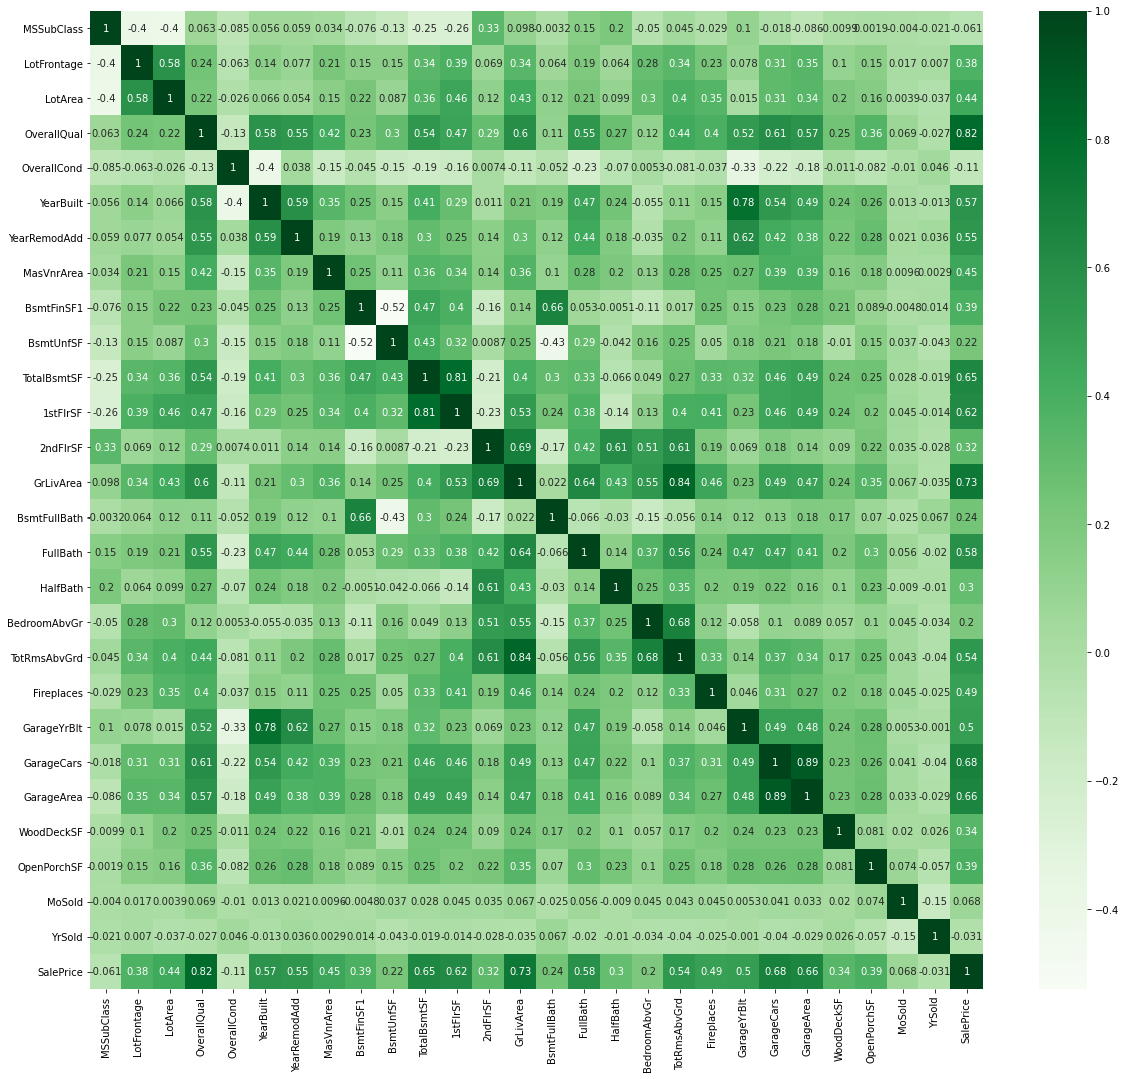

In [19]:
#replotting the heatmap for checking highly correlated variables
plt.figure(figsize=[20,18])
sns.heatmap(housedf[numerical_columns].corr(),cmap='Greens',annot=True)
plt.show()

In [20]:
#we can also remove the feature variables which are highly co-rellated with other feature variables
#for avoiding multi-colinearity
#like
#GarageYrBlt is highly correlated with YearBuilt (78%)
#1stFlrSF is highly correlated with TotalBsmtSF (81%)
#TotRmsAbvGrd is highly correlated with GrLivArea (84%)
#GarageCars is highly corelated with GarageArea (89%)
highlycorrelatedvariables=['GarageYrBlt','1stFlrSF','TotRmsAbvGrd','GarageCars']
housedf=housedf.drop(highlycorrelatedvariables,axis=1)


In [21]:
numerical_columns=[i  for i in numerical_columns if i not in highlycorrelatedvariables]

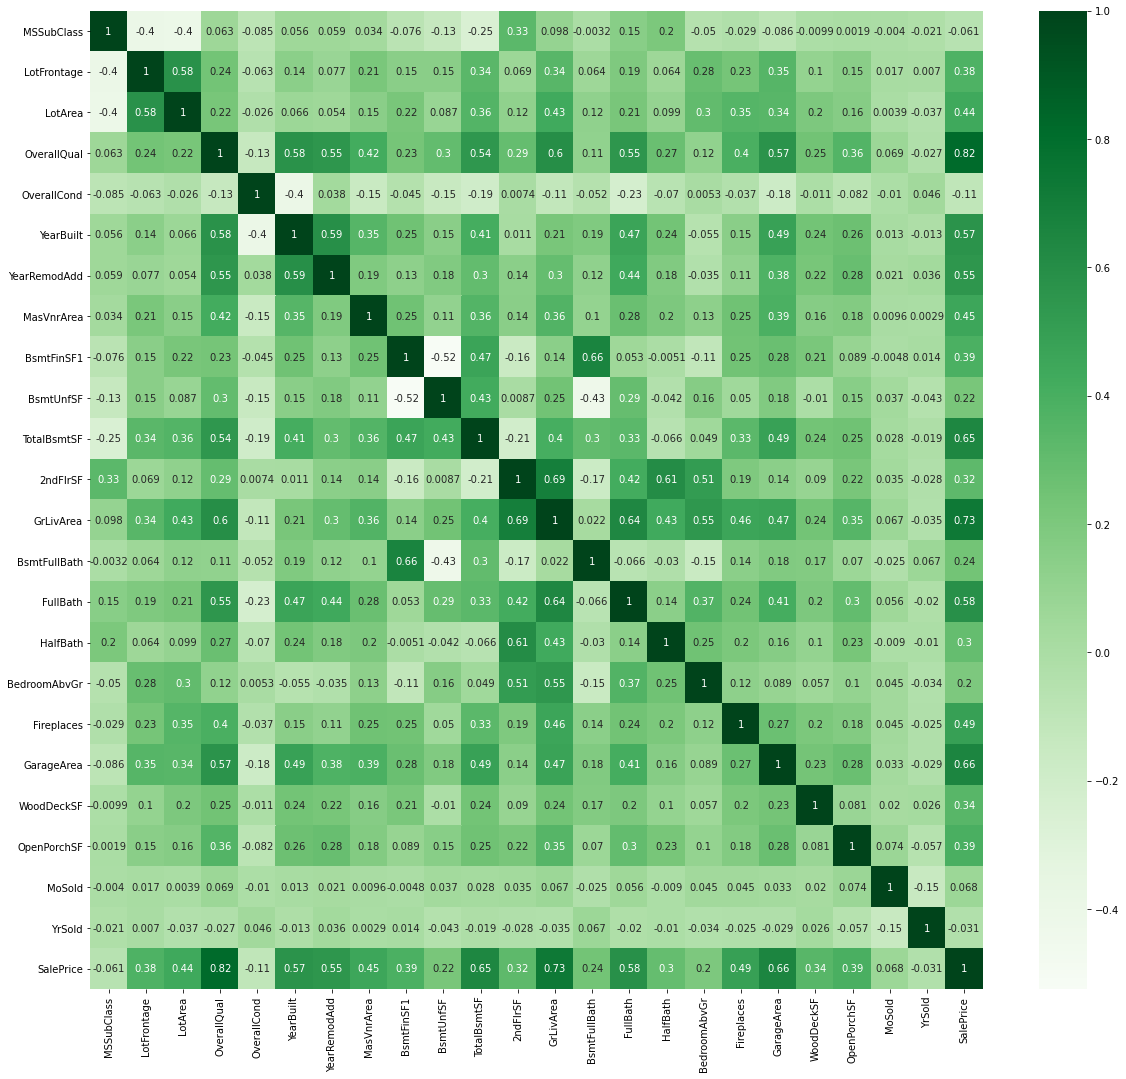

In [22]:
plt.figure(figsize=[20,18])
sns.heatmap(housedf[numerical_columns].corr(),cmap='Greens',annot=True)
plt.show()

In [23]:
#categorical variables which do not have an unbiased distribution will not add significance to the model building
#such biased categories(bias towards a single segment) are called as constant categorical variables
for c in categorical_columns:
    print(housedf[c].value_counts()[0],round(housedf[c].value_counts()[0]/len(housedf[c])*100,2))

1151 78.84
1454 99.59
1369 93.77
925 63.36
1311 89.79
1459 99.93
1052 72.05
1382 94.66
225 15.41
1260 86.3
1445 98.97
1220 83.56
726 49.73
1141 78.15
1434 98.22
515 35.27
504 34.52
872 59.73
906 62.05
1282 87.81
647 44.32
649 44.45
1311 89.79
953 65.27
430 29.45
1256 86.03
1428 97.81
741 50.75
1365 93.49
1335 91.44
735 50.34
1360 93.15
690 47.26
870 59.59
605 41.44
1311 89.79
1326 90.82
1340 91.78
1453 99.52
1179 80.75
1406 96.3
1267 86.78
1198 82.05


In [24]:
#we will drop all those categorical features where at least 90% of values are equal values
equalval_catcolumns=[]
for c in categorical_columns:
    if round(housedf[c].value_counts()[0]/len(housedf[c])*100,2)>=90:
        equalval_catcolumns.append(c)
equalval_catcolumns

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature']

In [25]:
categorical_columns=[i  for i in categorical_columns if i not in equalval_catcolumns]
housedf=housedf.drop(equalval_catcolumns,axis=1)

In [26]:
housedf.shape

(1460, 53)

In [27]:
housedf.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

<center><h1>Univariate analysis</h1></center>

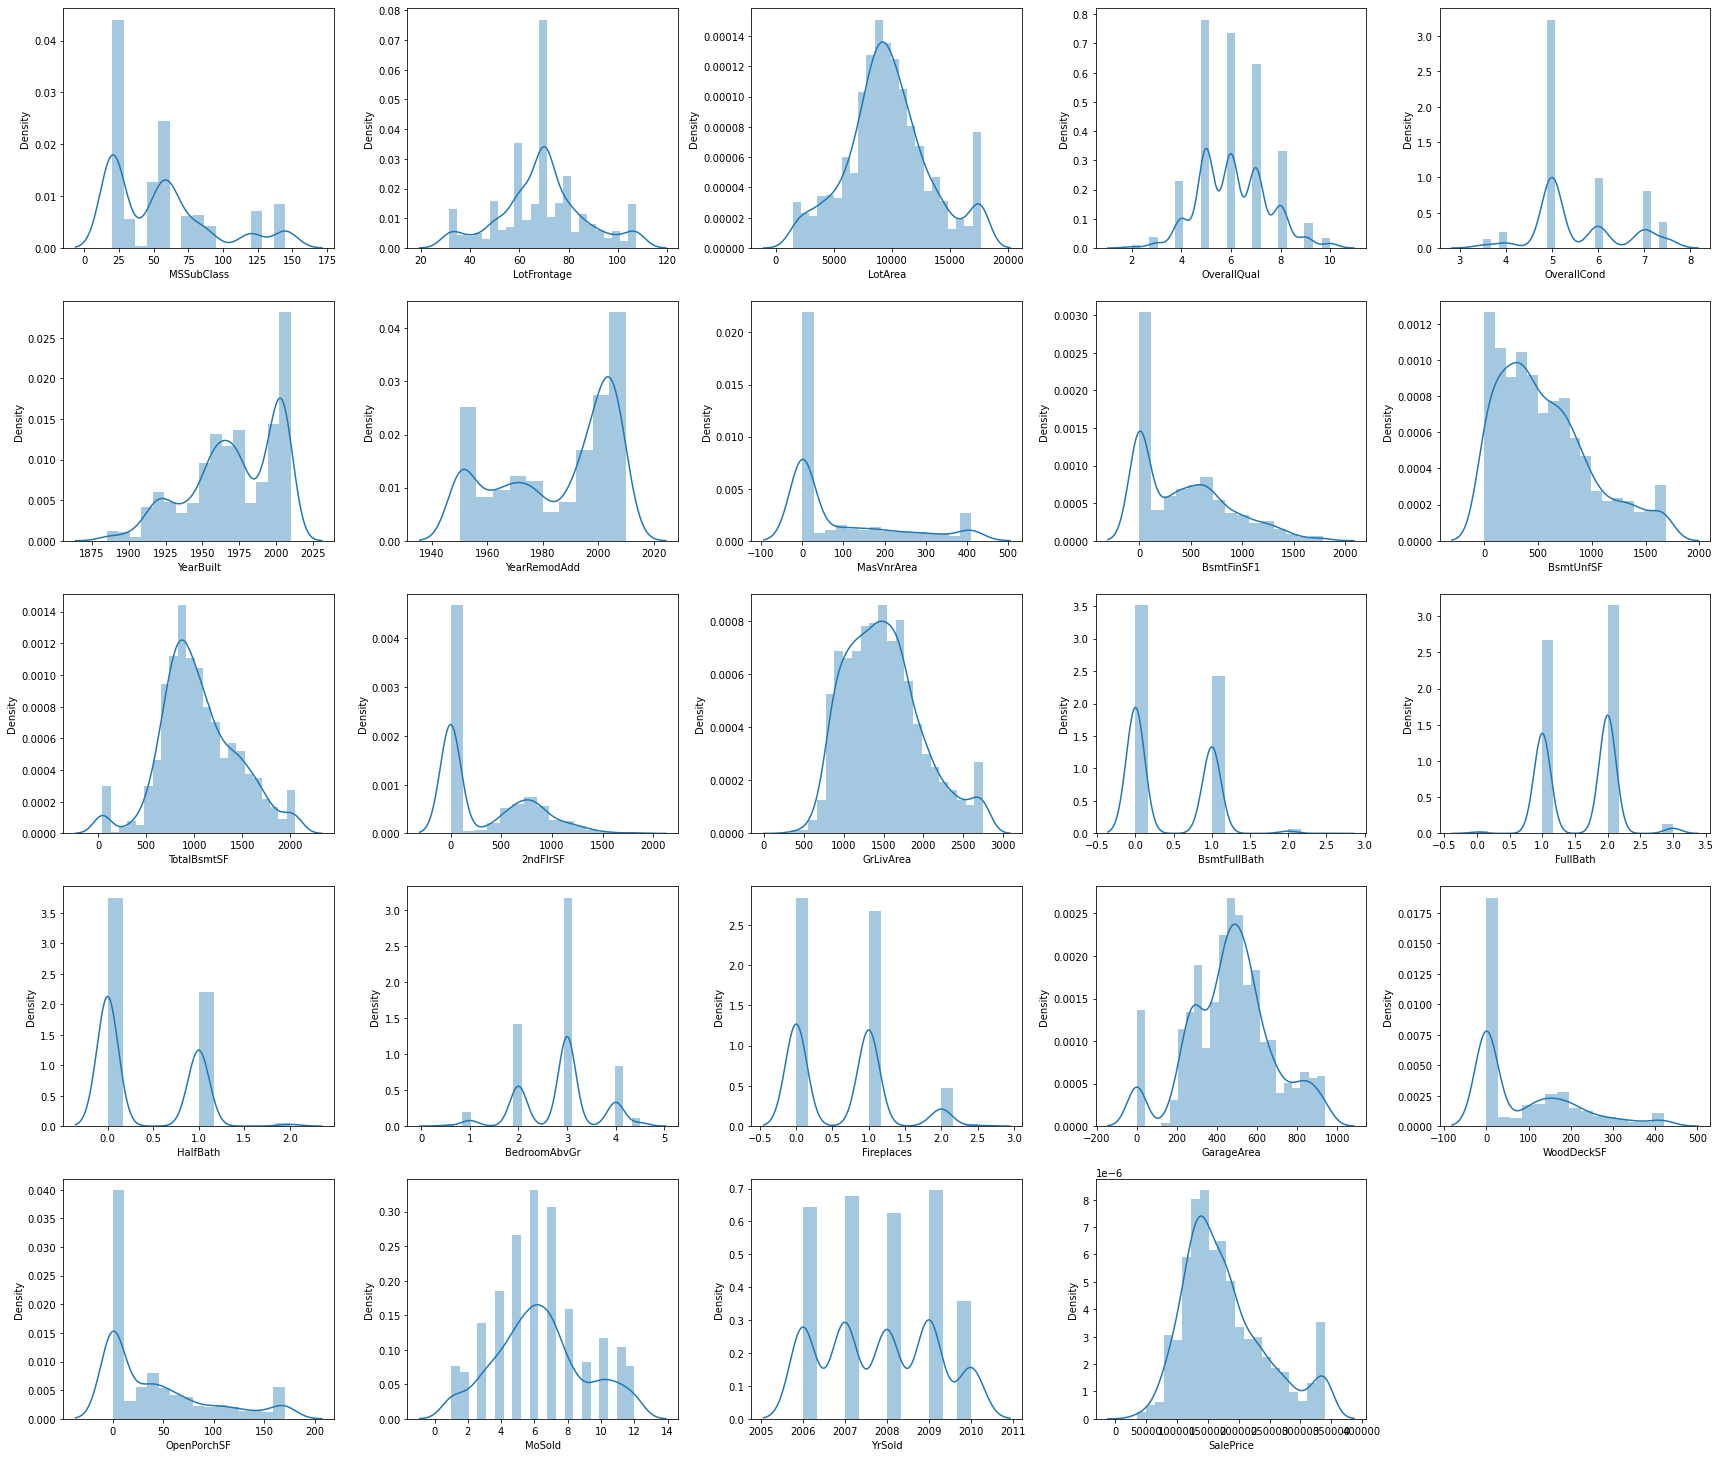

In [28]:
#let's take a look on the distribution of the numerical data
fig=plt.subplots(figsize=[24,24])
for i , c in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//4,5,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.distplot(housedf[c])
    plt.tight_layout()

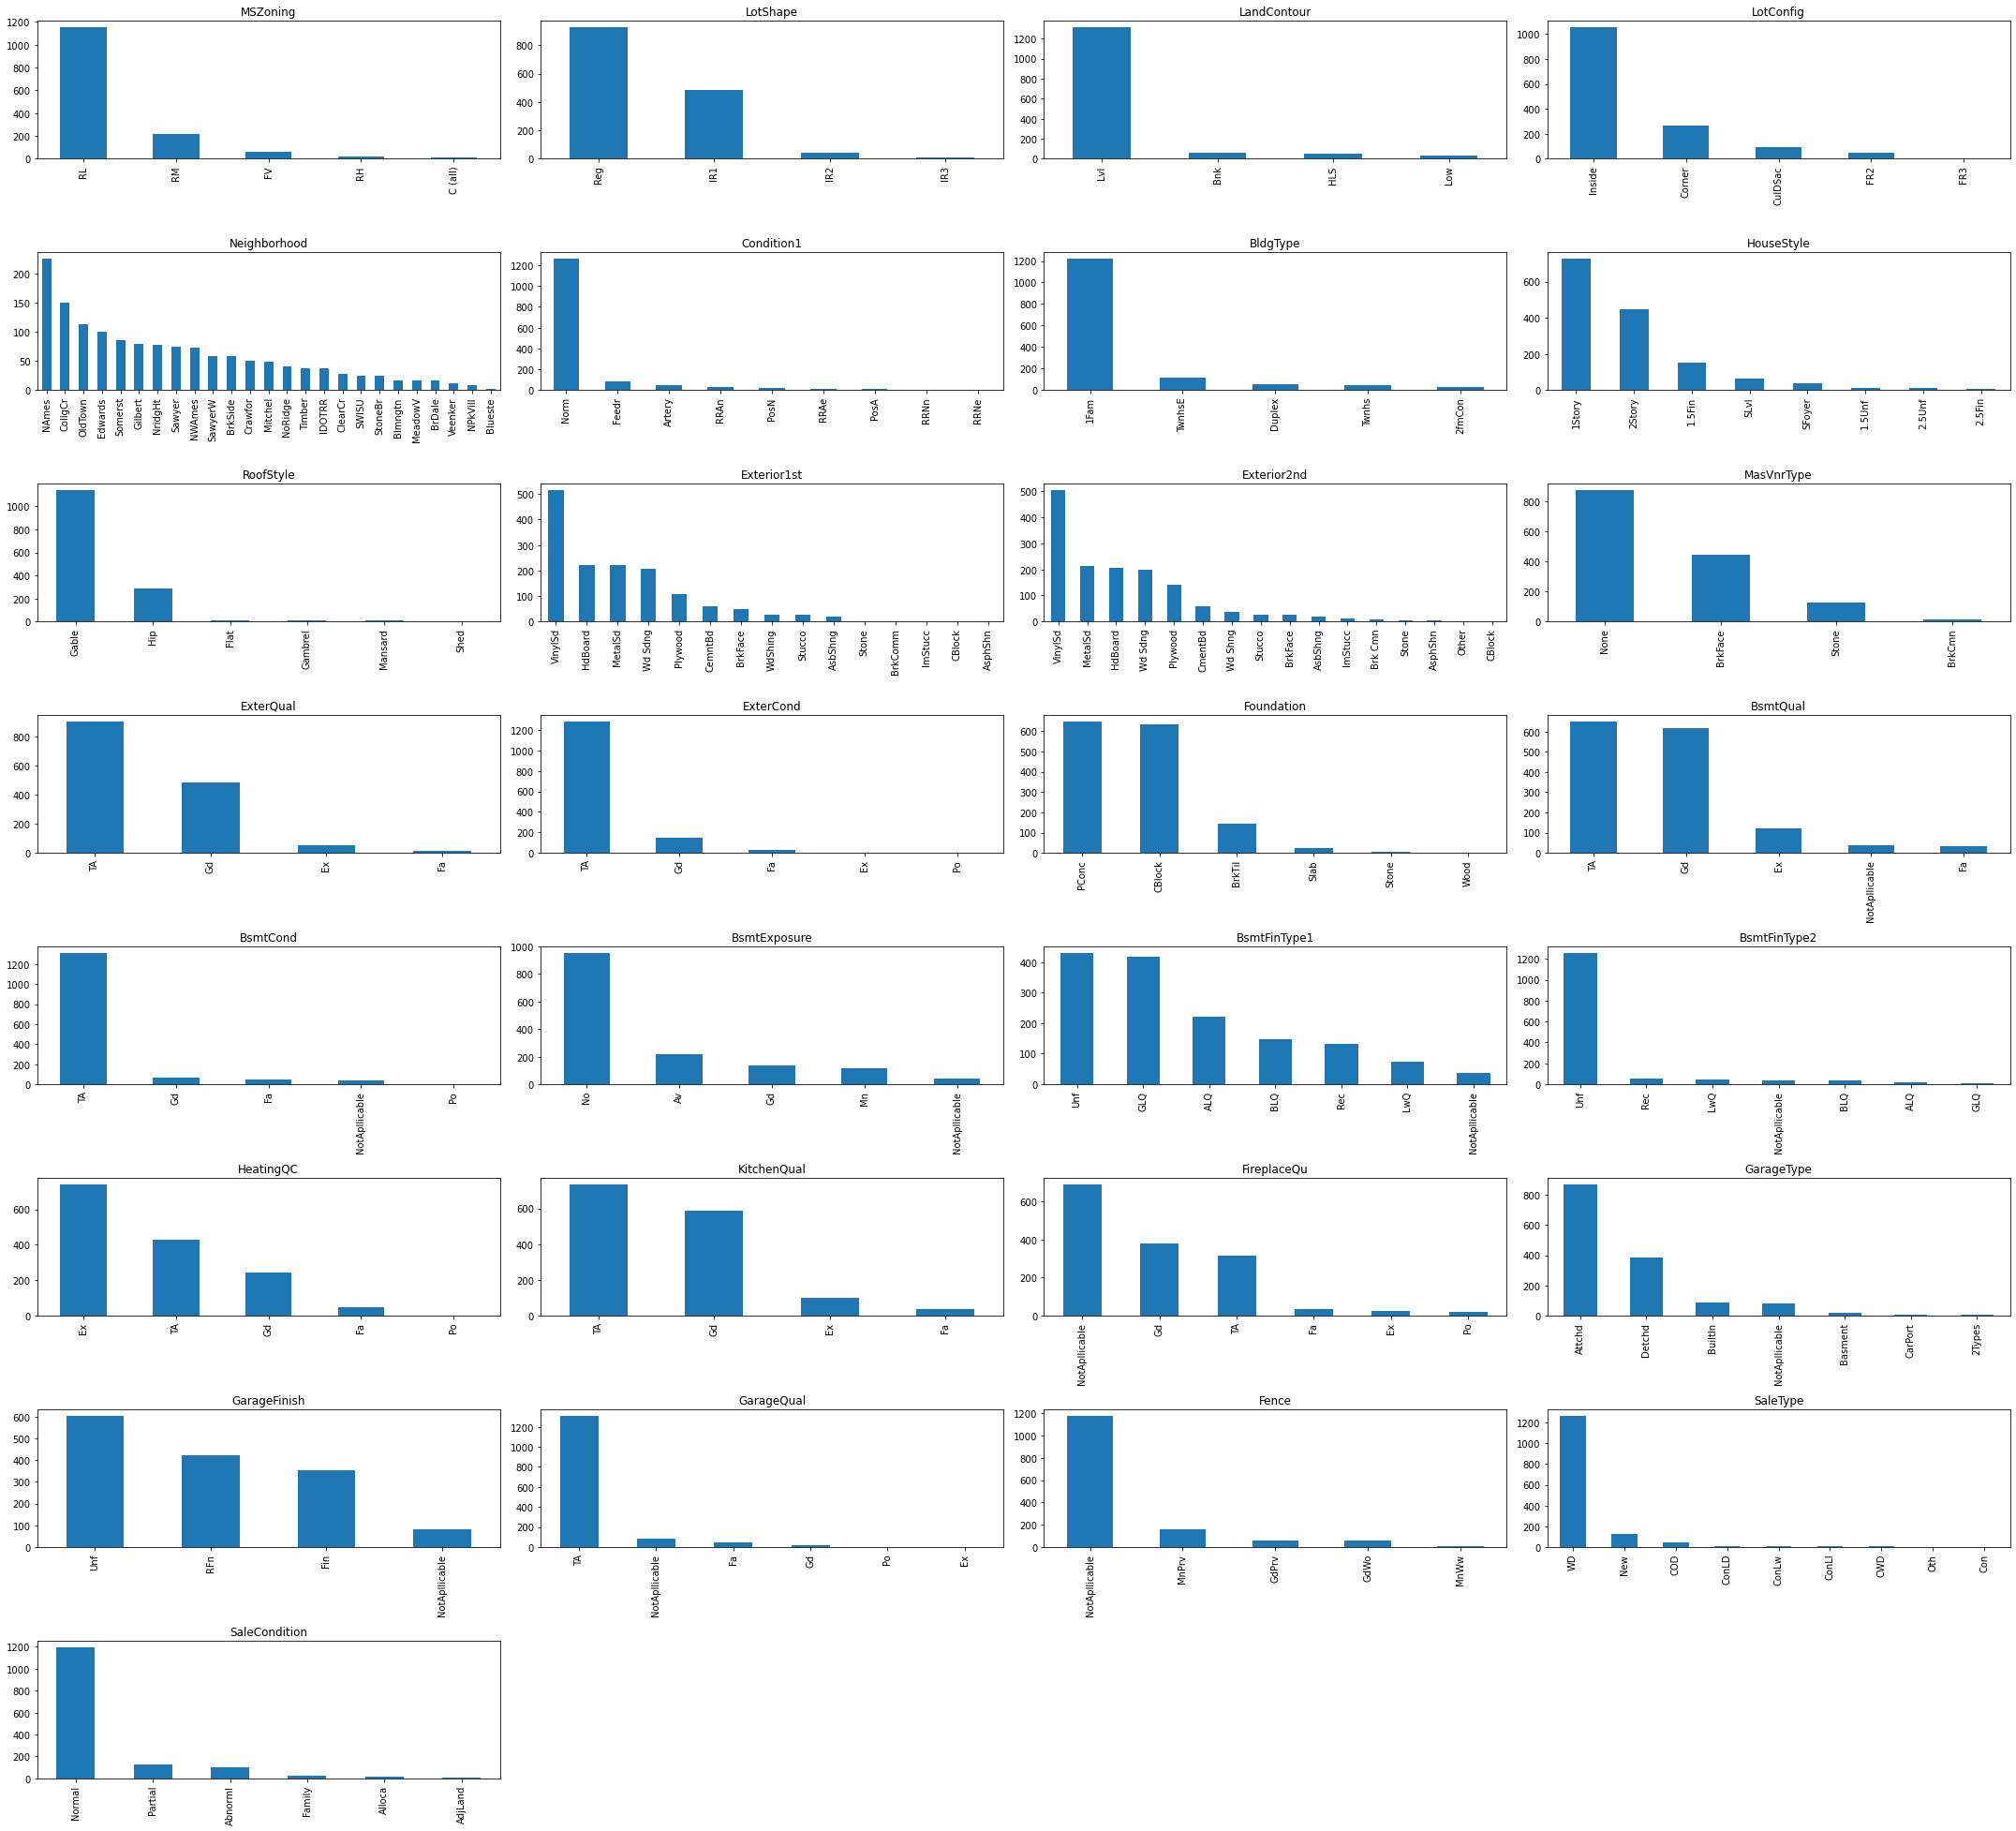

In [29]:
#let's check distribution of categorical data
fig=plt.subplots(figsize=[30,30])
for i , c in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns)//3,4,i+1)
    plt.subplots_adjust(hspace=2.0)
    housedf[c].value_counts().plot.bar()
    plt.title(c)
    plt.tight_layout()

<center><h1>Bivariate analysis</h2></center>

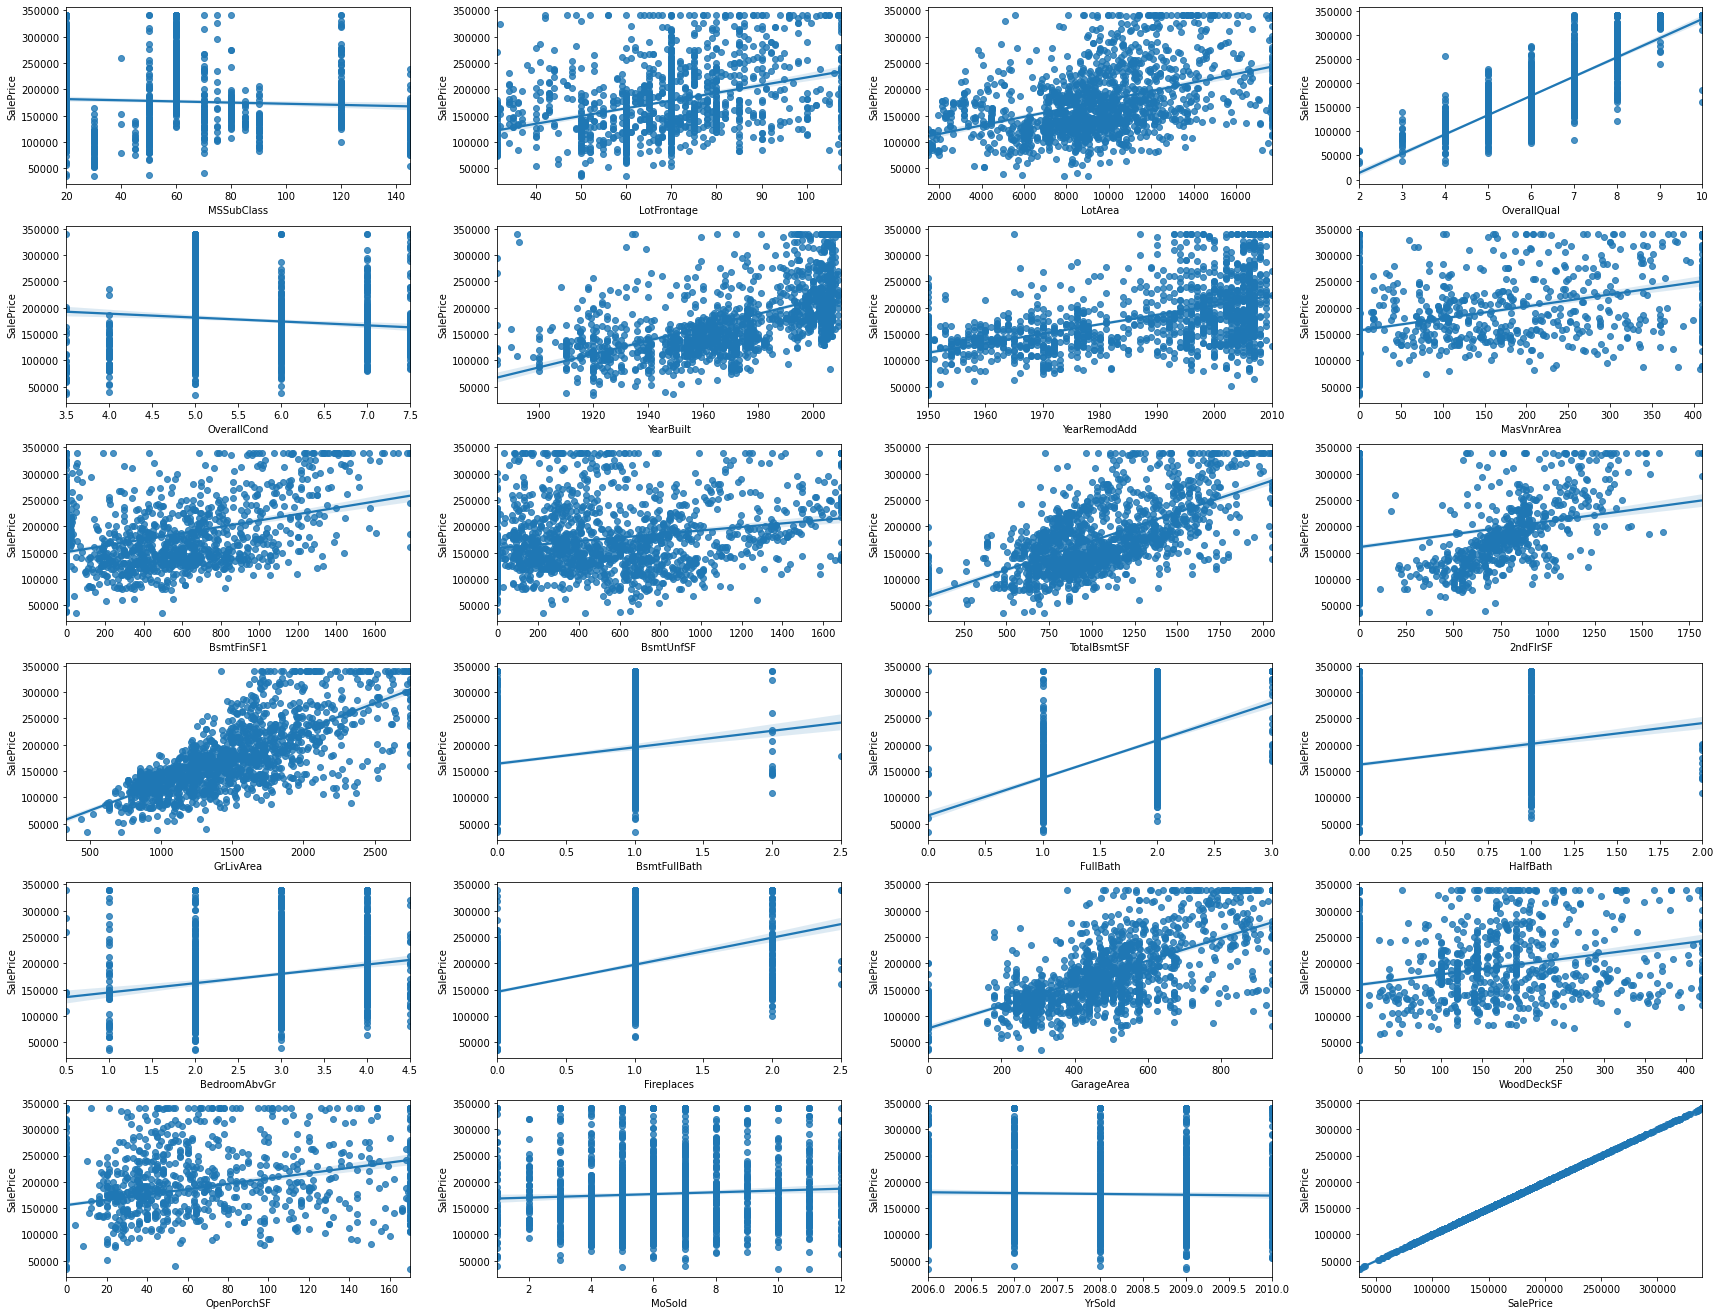

In [30]:
#let's take a look on the distribution of the numerical data w.r.t sale price
fig=plt.subplots(figsize=[24,24])
for i , c in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//3,4,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.regplot(housedf[c],housedf['SalePrice'])
    plt.tight_layout()

<B>Observation:-</B>Numerical features such as OverallQual,TotalBsmtSF,GrLivArea,FullBath,GarageArea are highly increasing the sale price of the house

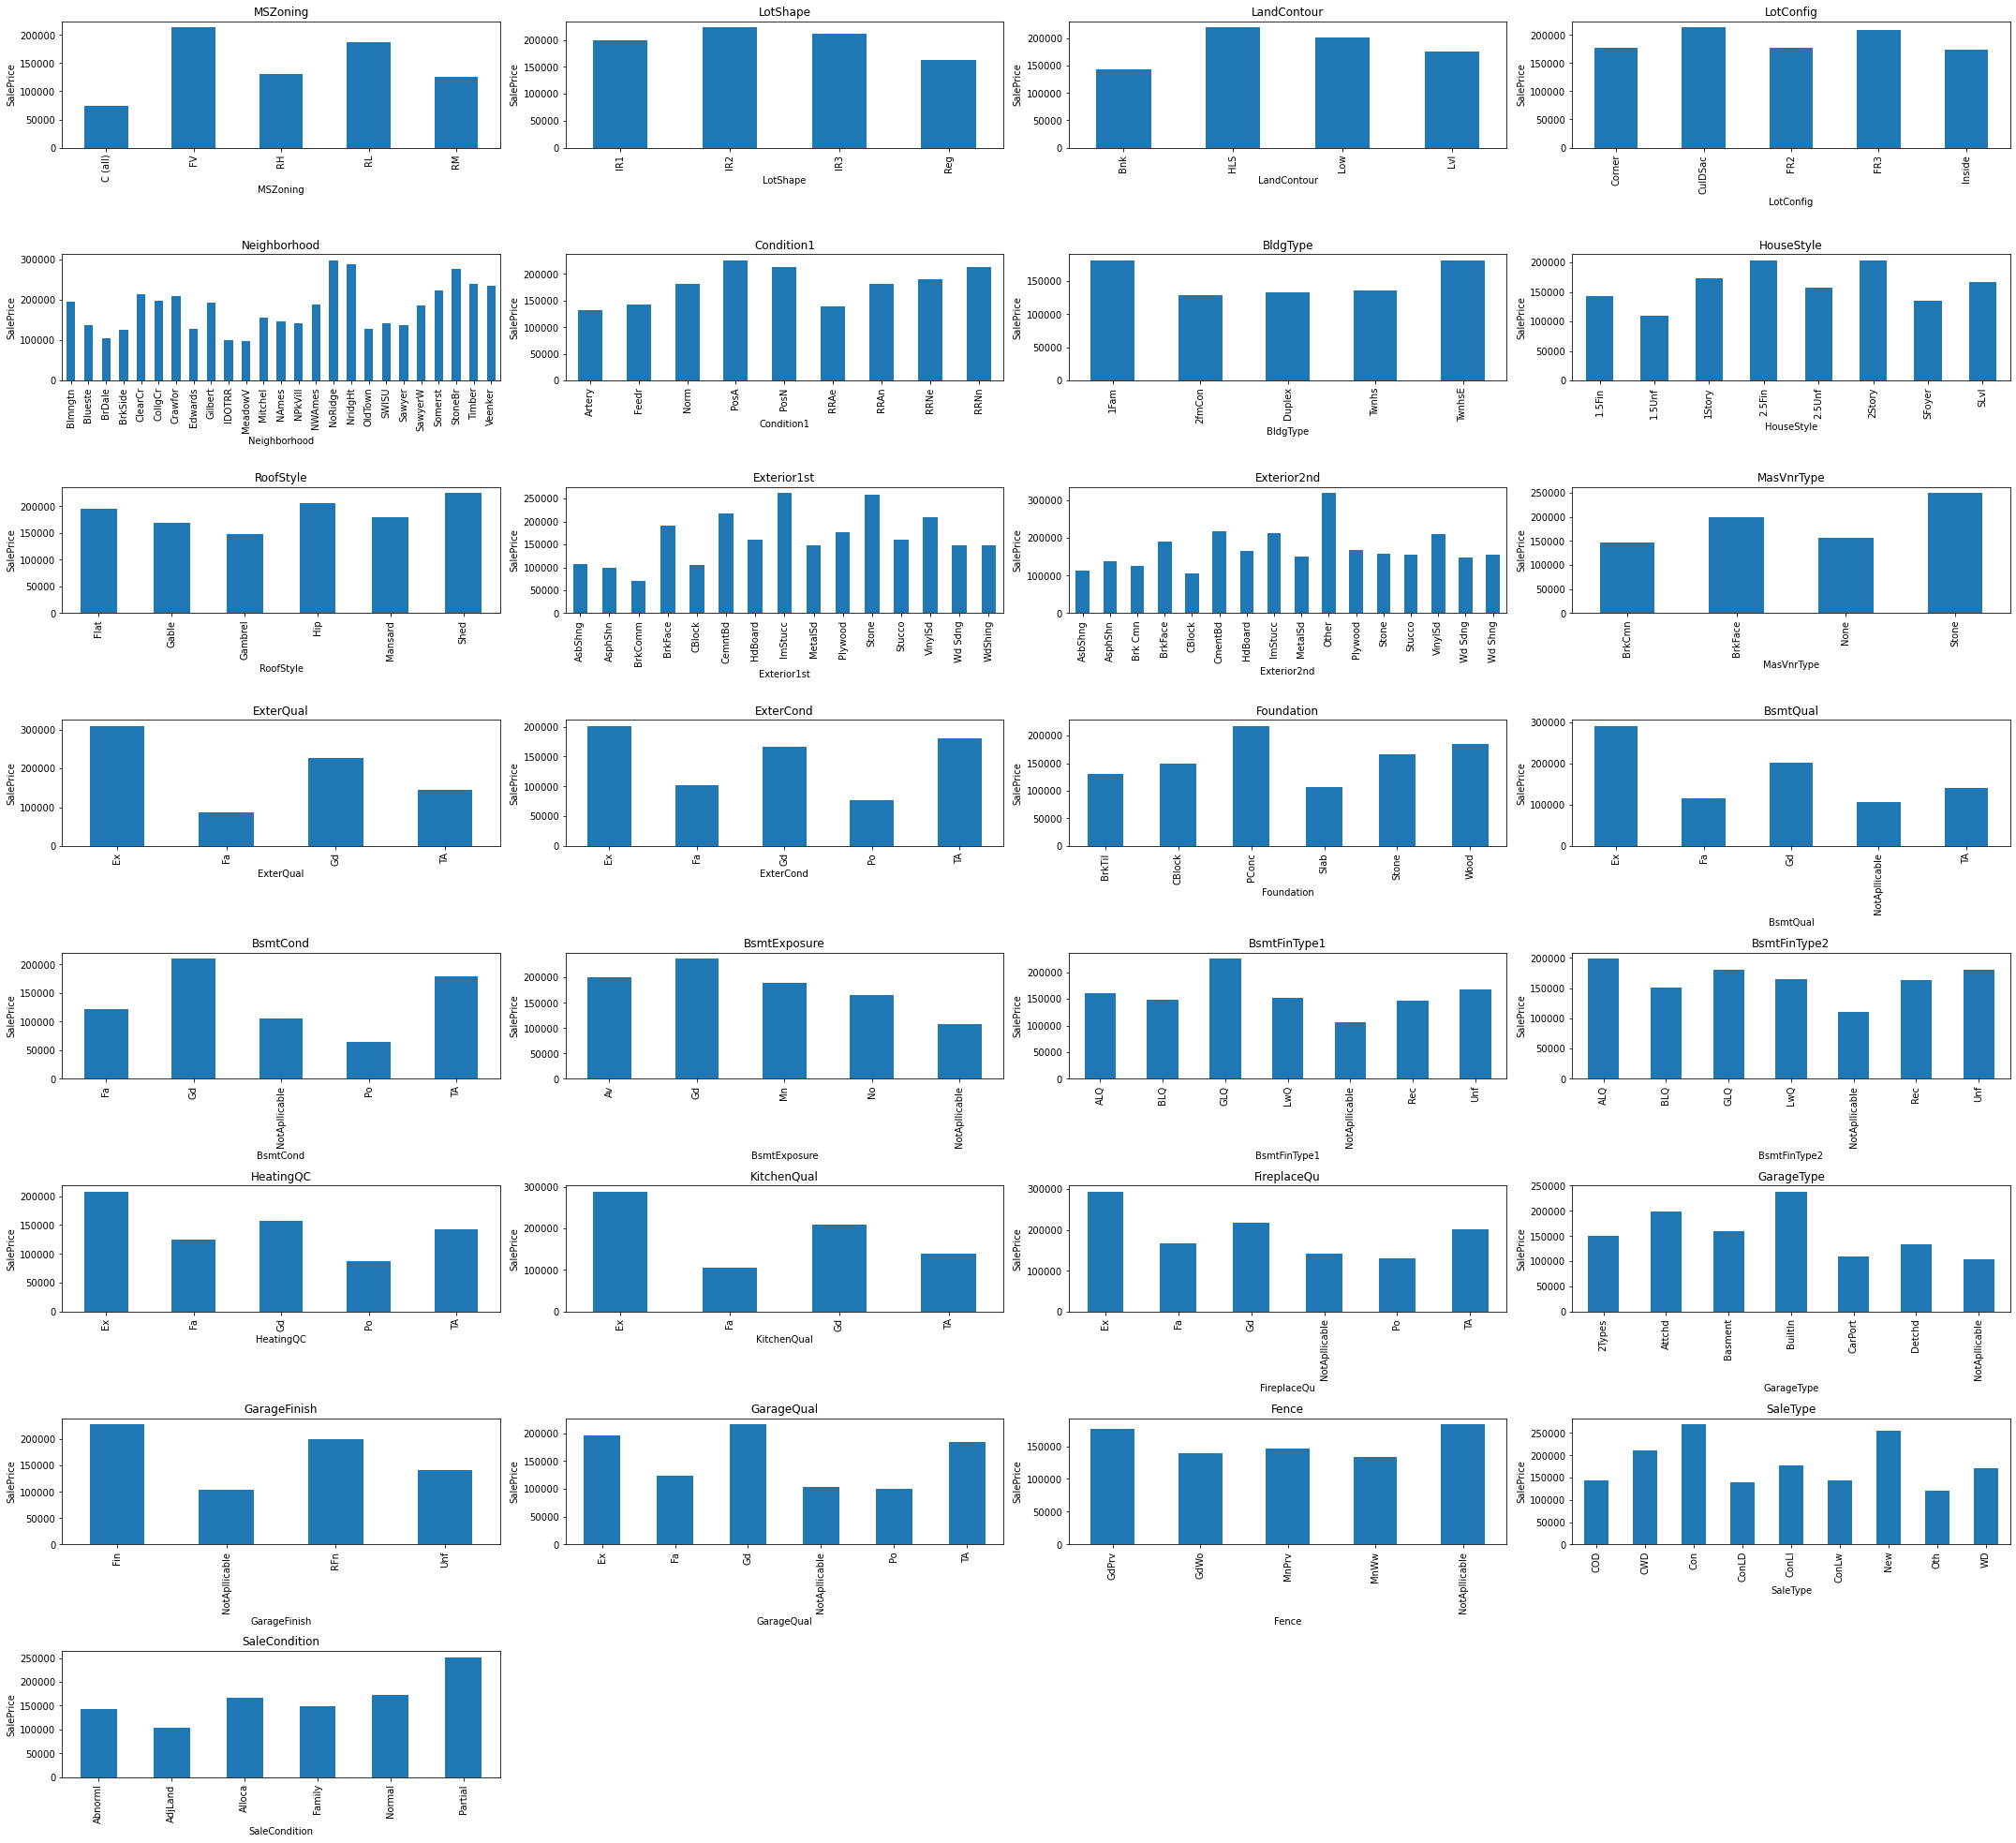

In [31]:
#let's check distribution of categorical data
fig=plt.subplots(figsize=[30,30])
for i , c in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns)//3,4,i+1)
    plt.subplots_adjust(hspace=2.0)
    housedf.groupby(c).SalePrice.mean().plot.bar()
    plt.title(c)
    plt.ylabel("SalePrice")
    plt.tight_layout()

<B>Observation:-</B>Categorical features like -: Neighbourhood , Exterior1,Exterior2 ,saletype, Condition1 , HouseStyle are having high variation of segments which are contributing highly to sale price

<center><h1>Data preparation for modeling</h1></center>

In [32]:
#let's first create dummy variables for categorical features
dummies=pd.get_dummies(housedf[categorical_columns],drop_first=True)

In [33]:
dummies.shape

(1460, 173)

In [34]:
dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=173)

In [35]:
#concatinate the dummy variables with dataframe
housedf=pd.concat([housedf,dummies],axis=1)
#remove original columns 
housedf=housedf.drop(categorical_columns,axis=1)

In [36]:
housedf

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600.0,6,7.5,1976,1976,0.0,978.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,490.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,5.0,1999,2000,0.0,0.0,953.0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175.0,6,6.0,1978,1988,119.0,790.0,589.0,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042.0,7,7.5,1941,2006,0.0,275.0,877.0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717.0,5,6.0,1950,1996,0.0,49.0,0.0,...,0,0,0,0,1,0,0,0,1,0


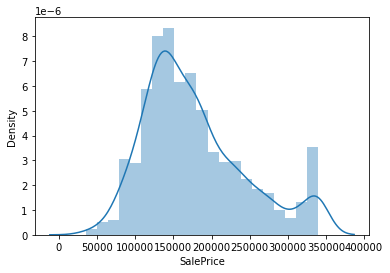

In [37]:
#we can see the target variable is left skewd , from the following distribution plot 
sns.distplot(housedf.SalePrice)
plt.show()

In [38]:
#to get better coefficients we will use a log transformation on the response variable
Y=np.log(housedf.pop("SalePrice"))

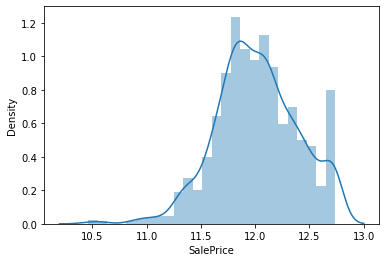

In [39]:
sns.distplot(Y)
plt.show()
#now we can see the variable is slidly normalized

In [40]:
#test train split , test being 70% and train 30%
X=housedf
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=100)

In [41]:
#created standard scaller for feature scalling
Scaler=StandardScaler()

In [42]:
#fit the scaller on train data set then transform them
numerical_columns.remove("SalePrice")
Xtrain[numerical_columns]=Scaler.fit_transform(Xtrain[numerical_columns])

In [43]:
Ytrain

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
          ...    
802     12.149502
53      12.736811
350     12.669998
79      11.608236
792     12.505399
Name: SalePrice, Length: 1022, dtype: float64

In [44]:
Xtrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.693001,-0.112224,-1.117794,-0.783218,0.467092,-1.530106,-1.695468,-0.665988,0.056432,-0.374649,...,0,0,0,0,1,0,0,0,1,0
318,0.092631,1.208500,0.081048,0.649994,-0.577478,0.717210,0.390510,1.237406,1.251929,-0.456880,...,0,0,0,0,1,0,0,0,1,0
239,-0.169246,-0.973566,-0.242382,-0.066612,-1.622047,-0.869131,-1.695468,-0.665988,-0.805062,0.184982,...,0,0,0,0,1,0,0,0,1,0
986,-0.169246,-0.571606,-1.199838,-0.066612,2.033947,-2.025838,0.875621,-0.665988,-1.021587,-0.171355,...,0,0,0,0,1,0,0,0,1,0
1416,2.318587,-0.514184,0.482895,-1.499824,0.467092,-2.852057,-1.695468,-0.665988,-1.021587,0.495634,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.092631,-0.341915,-0.393633,0.649994,-0.577478,1.113795,0.972643,-0.665988,0.471055,-1.096458,...,0,0,0,0,1,0,0,0,1,0
53,-0.954878,-0.054801,2.250322,2.083206,-0.577478,0.320625,0.099443,-0.665988,3.080013,-1.206100,...,0,0,0,0,1,0,0,0,1,0
350,1.663894,-0.054801,-0.499397,2.083206,-0.577478,1.179893,1.069665,2.025530,-1.021587,2.570835,...,0,0,1,0,0,0,0,0,0,1
79,-0.169246,-0.514184,0.231741,-0.783218,0.467092,-2.025838,-0.191624,-0.665988,-1.021587,-0.274144,...,0,0,0,0,1,0,0,0,1,0


In [45]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 210 to 792
Columns: 196 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(23), uint8(173)
memory usage: 364.3 KB


<center><h1>Modeling a simple linear regression model</h1></center>

In [46]:
#building a linear regression model on train data
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)

LinearRegression()

In [47]:
#predict the response value from train data set
Y_trainpred=lr.predict(Xtrain)

In [48]:
r2_score(Ytrain,Y_trainpred)

0.9386714153063868

In [49]:
Xtest[numerical_columns]=Scaler.transform(Xtest[numerical_columns])

In [50]:
Y_testpred=lr.predict(Xtest)

In [51]:
r2_score(Ytest,Y_testpred)

-5.641326729797621e+20

<B>Observation</B> -: We can see there is a <B>negative r2 score</B> value on test data set , which clearly shows the RSS value is greater than TSS (r2=1-(RSS/TSS)) if there exists some variables which increases the RSS to a point where it becomes greater than the TSS value a negative r2 value is possible. For this we need to remove such features

<center><h3>Finding optimal number of features for modelling </h3></center>

In [52]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, len(Xtrain)))}]
lm = LinearRegression()
lm.fit(Xtrain, Ytrain)
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(Xtrain, Ytrain) 

Fitting 5 folds for each of 1021 candidates, totalling 5105 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.802054,0.082826,0.003590,1.196973e-03,1,{'n_features_to_select': 1},-2.204687e-02,-2.419282e-03,-4.878844e-03,-2.677207e-02,...,-1.187552e-02,1.037262e-02,61,0.008907,0.011946,0.008707,0.002626,0.012449,0.008927,0.003501
1,0.838950,0.024856,0.004588,1.016747e-03,2,{'n_features_to_select': 2},7.728527e-02,-5.914831e-03,-4.181199e-03,-1.878934e-02,...,1.162069e-02,3.405136e-02,60,0.084211,0.014302,0.021608,0.020134,0.028442,0.033739,0.025634
2,0.848131,0.028534,0.003590,7.978082e-04,3,{'n_features_to_select': 3},6.988116e-02,1.662392e-02,1.226709e-02,5.800294e-02,...,6.401514e-02,5.450128e-02,59,0.092955,0.028248,0.036389,0.184476,0.179819,0.104377,0.067314
3,0.841748,0.007516,0.003192,3.988505e-04,4,{'n_features_to_select': 4},6.843825e-02,1.748993e-01,1.837574e-01,6.128212e-02,...,1.309704e-01,5.430197e-02,58,0.110802,0.175920,0.183587,0.184640,0.180112,0.167012,0.028270
4,0.832772,0.038847,0.003591,1.196957e-03,5,{'n_features_to_select': 5},6.714115e-02,1.756702e-01,1.822641e-01,6.850441e-02,...,1.315521e-01,5.235745e-02,57,0.112084,0.176966,0.185316,0.203371,0.200246,0.175597,0.033194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.016156,0.002393,0.003989,1.092623e-03,1017,{'n_features_to_select': 1017},-1.735501e+22,-4.621816e+19,-1.187342e+19,-1.219326e+23,...,-2.799782e+22,4.743368e+22,126,0.949066,0.943872,0.937560,0.937280,0.942923,0.942140,0.004386
1017,0.014760,0.001466,0.003989,3.162980e-07,1018,{'n_features_to_select': 1018},-1.735501e+22,-4.621816e+19,-1.187342e+19,-1.219326e+23,...,-2.799782e+22,4.743368e+22,126,0.949066,0.943872,0.937560,0.937280,0.942923,0.942140,0.004386
1018,0.015159,0.000977,0.004189,1.163105e-03,1019,{'n_features_to_select': 1019},-1.735501e+22,-4.621816e+19,-1.187342e+19,-1.219326e+23,...,-2.799782e+22,4.743368e+22,126,0.949066,0.943872,0.937560,0.937280,0.942923,0.942140,0.004386
1019,0.014361,0.000798,0.003391,7.983208e-04,1020,{'n_features_to_select': 1020},-1.735501e+22,-4.621816e+19,-1.187342e+19,-1.219326e+23,...,-2.799782e+22,4.743368e+22,126,0.949066,0.943872,0.937560,0.937280,0.942923,0.942140,0.004386


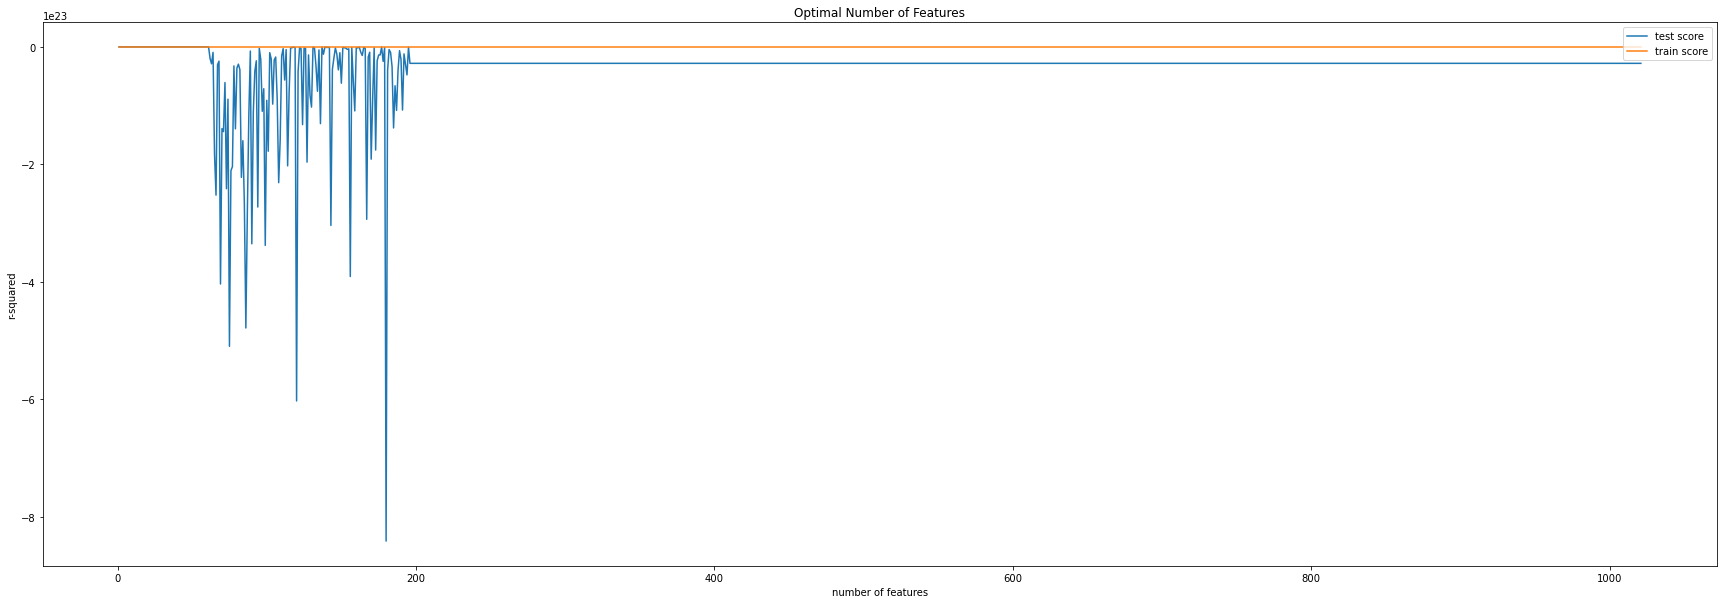

In [54]:
# plotting cv results
plt.figure(figsize=(30,10))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

<B>Observation-:</B>From above graph we can see 0 to 50-55 features are falling very close to the train R2 score , thus we will extract 50 or 55 top features using RFE.

<center><h3>Automated feature selection</h3></center>

In [55]:
#linear regression model using optimal numbers of feature , optimal numbers of feature being 55 as seen in the CV result for RFE
#moving forward we will use this 55 features for model building.
lm=LinearRegression()
rfe=RFE(lm,n_features_to_select=55)
rfe.fit(Xtrain,Ytrain)
rfe.support_

array([False, False, False,  True, False, False,  True, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [56]:
feature_rank=list(zip(rfe.support_,Xtrain.columns,rfe.ranking_))

In [57]:
#filtering out the top 55 features selected by RFE
selected_features=[]
for f in feature_rank:
    if (f[0]) :
        selected_features.append(f[1])
selected_features

['OverallQual',
 'YearRemodAdd',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_Low',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Condition1_Norm',
 'Condition1_RRNe',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_MetalSd',
 'ExterCond_Fa',
 'Foundation_Wood',
 'BsmtCond_NotApllicable',
 'BsmtFinType2_BLQ',
 'HeatingQC_Po',
 'FireplaceQu_Gd',
 'GarageType_NotApllicable',
 'GarageFinish_NotApllicable',
 'GarageQual

<center><h3>Manual feature selection , using summary statistics( P-value and VIF)</h3></center>

In [58]:
#rebuilding the linear regression model using the selected features from RFE 
#using statsmodel for seeing summary statistics 
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:22   Log-Likelihood:                 752.60
No. Observations:                1022   AIC:                            -1403.
Df Residuals:                     971   BIC:                            -1152.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.3841      0.056    204.398      0.000      11.275      11.493
OverallQual                    0.0832      0.007     12.762      0.000       0.070       0.096
YearRemodAdd                   0.0573      0.005     11.189      0.000       0.047       0.067
BsmtUnfSF                     -0.0522      0.005    -11.459      0.000      -0.061      -0.043
TotalBsmtSF                    0.0938      0.006     15.995      0.000       0.082       0.105
GrLivArea                      0.1398      0.005     27.622      0.000       0.130       0.150
MSZoning_FV                    0.4475      0.065      6.856      0.000       0.319       0.576
MSZoning_RH                    0.4446      0.063      7.017      0.000       0.320       0.569
MSZoning_RL                    0.5038      0.054      9.313      0.000       0.398       0.610
MSZoning_RM                    0.4141      0.052      7.976      0.000       0.312       0.516
LotShape_IR3                  -0.0984      0.041     -2.413      0.016      -0.179      -0.018
LandContour_Low                0.0712      0.024      2.997      0.003       0.025       0.118
Neighborhood_BrDale           -0.1050      0.044     -2.390      0.017      -0.191      -0.019
Neighborhood_Crawfor           0.0794      0.023      3.450      0.001       0.034       0.125
Neighborhood_Edwards          -0.1211      0.016     -7.361      0.000      -0.153      -0.089
Neighborhood_IDOTRR           -0.0565      0.031     -1.848      0.065      -0.117       0.003
Neighborhood_MeadowV          -0.1659      0.051     -3.234      0.001      -0.267      -0.065
Neighborhood_NAmes            -0.0513      0.013     -3.991      0.000      -0.077      -0.026
Neighborhood_OldTown          -0.0626      0.021     -3.002      0.003      -0.103      -0.022
Neighborhood_Sawyer           -0.0558      0.019     -2.885      0.004      -0.094      -0.018
Neighborhood_Somerst           0.0978      0.032      3.011      0.003       0.034       0.162
Condition1_Norm                0.0575      0.011      5.032      0.000       0.035       0.080
Condition1_RRNe                0.0558      0.086      0.653      0.514      -0.112       0.224
BldgType_2fmCon               -0.0717      0.027     -2.627      0.009      -0.125      -0.018
BldgType_Duplex               -0.0780      0.023     -3.448      0.001      -0.122      -0.034
BldgType_Twnhs                -0.0924      0.025     -3.657      0.000      -0.142      -0.043
Exterior1st_AsphShn            0.0198      0.062      0.321      0.749      -0.101       0.141
Exterior1st_BrkComm           -0.2214      0.088     -2.514      0.012      -0.394      -0.049
Exterior1st_BrkFace            0.1142      0.025      4.602      0.000       0.066       0.163
Exterior1st_CBlock            -0.0196      

In [59]:
highpvallist=['Neighborhood_IDOTRR','Condition1_RRNe','Exterior1st_AsphShn','Exterior1st_CBlock','Exterior1st_ImStucc','Exterior2nd_AsphShn','Exterior2nd_CBlock','Foundation_Wood','BsmtCond_NotApllicable','HeatingQC_Po','SaleType_Con']
selected_features=[i  for i in selected_features if i not in highpvallist]

In [60]:
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:22   Log-Likelihood:                 747.61
No. Observations:                1022   AIC:                            -1411.
Df Residuals:                     980   BIC:                            -1204.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.3393      0.049    229.364      0.000      11.242      11.436
OverallQual                    0.0849      0.006     13.104      0.000       0.072       0.098
YearRemodAdd                   0.0581      0.005     11.395      0.000       0.048       0.068
BsmtUnfSF                     -0.0525      0.005    -11.605      0.000      -0.061      -0.044
TotalBsmtSF                    0.0936      0.005     17.791      0.000       0.083       0.104
GrLivArea                      0.1393      0.005     27.742      0.000       0.129       0.149
MSZoning_FV                    0.4948      0.060      8.213      0.000       0.377       0.613
MSZoning_RH                    0.4909      0.058      8.479      0.000       0.377       0.605
MSZoning_RL                    0.5477      0.048     11.372      0.000       0.453       0.642
MSZoning_RM                    0.4433      0.049      9.037      0.000       0.347       0.540
LotShape_IR3                  -0.0995      0.041     -2.440      0.015      -0.180      -0.019
LandContour_Low                0.0722      0.024      3.041      0.002       0.026       0.119
Neighborhood_BrDale           -0.0917      0.043     -2.119      0.034      -0.177      -0.007
Neighborhood_Crawfor           0.0826      0.023      3.614      0.000       0.038       0.127
Neighborhood_Edwards          -0.1153      0.016     -7.108      0.000      -0.147      -0.084
Neighborhood_MeadowV          -0.1494      0.051     -2.954      0.003      -0.249      -0.050
Neighborhood_NAmes            -0.0483      0.013     -3.793      0.000      -0.073      -0.023
Neighborhood_OldTown          -0.0471      0.019     -2.504      0.012      -0.084      -0.010
Neighborhood_Sawyer           -0.0533      0.019     -2.766      0.006      -0.091      -0.015
Neighborhood_Somerst           0.0972      0.032      2.994      0.003       0.033       0.161
Condition1_Norm                0.0567      0.011      5.027      0.000       0.035       0.079
BldgType_2fmCon               -0.0705      0.027     -2.587      0.010      -0.124      -0.017
BldgType_Duplex               -0.0730      0.021     -3.429      0.001      -0.115      -0.031
BldgType_Twnhs                -0.0901      0.025     -3.578      0.000      -0.139      -0.041
Exterior1st_BrkComm           -0.2158      0.087     -2.472      0.014      -0.387      -0.044
Exterior1st_BrkFace            0.1174      0.024      4.812      0.000       0.070       0.165
Exterior1st_HdBoard            0.0480      0.014      3.314      0.001       0.020       0.076
Exterior1st_Plywood            0.0692      0.018      3.902      0.000       0.034       0.104
Exterior1st_VinylSd            0.0908      0.013      6.914      0.000       0.065       0.117
Exterior1st_WdShing            0.0646      

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
VIF=pd.DataFrame()
VIF['features']=selected_features
VIF['VIF']=[variance_inflation_factor(Xtrain[selected_features].values,i) for i in range(Xtrain[selected_features].shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

In [63]:
VIF

,features,VIF
43,SaleCondition_Partial,inf
40,SaleType_New,inf
38,GarageQual_NotApllicable,inf
35,GarageFinish_NotApllicable,inf
34,GarageType_NotApllicable,inf
7,MSZoning_RL,21.286210
42,SaleCondition_Normal,11.134577
19,Condition1_Norm,7.470630
5,MSZoning_FV,5.533947
8,MSZoning_RM,5.365317


In [64]:
#removing SaleCondition_Partial
selected_features.remove('SaleCondition_Partial')
#rebuild model 
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:23   Log-Likelihood:                 747.61
No. Observations:                1022   AIC:                            -1411.
Df Residuals:                     980   BIC:                            -1204.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.3393      0.049    229.364      0.000      11.242      11.436
OverallQual                    0.0849      0.006     13.104      0.000       0.072       0.098
YearRemodAdd                   0.0581      0.005     11.395      0.000       0.048       0.068
BsmtUnfSF                     -0.0525      0.005    -11.605      0.000      -0.061      -0.044
TotalBsmtSF                    0.0936      0.005     17.791      0.000       0.083       0.104
GrLivArea                      0.1393      0.005     27.742      0.000       0.129       0.149
MSZoning_FV                    0.4948      0.060      8.213      0.000       0.377       0.613
MSZoning_RH                    0.4909      0.058      8.479      0.000       0.377       0.605
MSZoning_RL                    0.5477      0.048     11.372      0.000       0.453       0.642
MSZoning_RM                    0.4433      0.049      9.037      0.000       0.347       0.540
LotShape_IR3                  -0.0995      0.041     -2.440      0.015      -0.180      -0.019
LandContour_Low                0.0722      0.024      3.041      0.002       0.026       0.119
Neighborhood_BrDale           -0.0917      0.043     -2.119      0.034      -0.177      -0.007
Neighborhood_Crawfor           0.0826      0.023      3.614      0.000       0.038       0.127
Neighborhood_Edwards          -0.1153      0.016     -7.108      0.000      -0.147      -0.084
Neighborhood_MeadowV          -0.1494      0.051     -2.954      0.003      -0.249      -0.050
Neighborhood_NAmes            -0.0483      0.013     -3.793      0.000      -0.073      -0.023
Neighborhood_OldTown          -0.0471      0.019     -2.504      0.012      -0.084      -0.010
Neighborhood_Sawyer           -0.0533      0.019     -2.766      0.006      -0.091      -0.015
Neighborhood_Somerst           0.0972      0.032      2.994      0.003       0.033       0.161
Condition1_Norm                0.0567      0.011      5.027      0.000       0.035       0.079
BldgType_2fmCon               -0.0705      0.027     -2.587      0.010      -0.124      -0.017
BldgType_Duplex               -0.0730      0.021     -3.429      0.001      -0.115      -0.031
BldgType_Twnhs                -0.0901      0.025     -3.578      0.000      -0.139      -0.041
Exterior1st_BrkComm           -0.2158      0.087     -2.472      0.014      -0.387      -0.044
Exterior1st_BrkFace            0.1174      0.024      4.812      0.000       0.070       0.165
Exterior1st_HdBoard            0.0480      0.014      3.314      0.001       0.020       0.076
Exterior1st_Plywood            0.0692      0.018      3.902      0.000       0.034       0.104
Exterior1st_VinylSd            0.0908      0.013      6.914      0.000       0.065       0.117
Exterior1st_WdShing            0.0646      

In [65]:
VIF=pd.DataFrame()
VIF['features']=selected_features
VIF['VIF']=[variance_inflation_factor(Xtrain[selected_features].values,i) for i in range(Xtrain[selected_features].shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

VIF

,features,VIF
38,GarageQual_NotApllicable,inf
35,GarageFinish_NotApllicable,inf
34,GarageType_NotApllicable,inf
7,MSZoning_RL,21.286210
42,SaleCondition_Normal,11.134577
19,Condition1_Norm,7.470630
5,MSZoning_FV,5.533947
8,MSZoning_RM,5.365317
18,Neighborhood_Somerst,4.472475
27,Exterior1st_VinylSd,4.157068


In [66]:
selected_features.remove('GarageQual_NotApllicable')


In [67]:
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:24   Log-Likelihood:                 747.61
No. Observations:                1022   AIC:                            -1411.
Df Residuals:                     980   BIC:                            -1204.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         11.3393      0.049    229.364      0.000      11.242      11.436
OverallQual                    0.0849      0.006     13.104      0.000       0.072       0.098
YearRemodAdd                   0.0581      0.005     11.395      0.000       0.048       0.068
BsmtUnfSF                     -0.0525      0.005    -11.605      0.000      -0.061      -0.044
TotalBsmtSF                    0.0936      0.005     17.791      0.000       0.083       0.104
GrLivArea                      0.1393      0.005     27.742      0.000       0.129       0.149
MSZoning_FV                    0.4948      0.060      8.213      0.000       0.377       0.613
MSZoning_RH                    0.4909      0.058      8.479      0.000       0.377       0.605
MSZoning_RL                    0.5477      0.048     11.372      0.000       0.453       0.642
MSZoning_RM                    0.4433      0.049      9.037      0.000       0.347       0.540
LotShape_IR3                  -0.0995      0.041     -2.440      0.015      -0.180      -0.019
LandContour_Low                0.0722      0.024      3.041      0.002       0.026       0.119
Neighborhood_BrDale           -0.0917      0.043     -2.119      0.034      -0.177      -0.007
Neighborhood_Crawfor           0.0826      0.023      3.614      0.000       0.038       0.127
Neighborhood_Edwards          -0.1153      0.016     -7.108      0.000      -0.147      -0.084
Neighborhood_MeadowV          -0.1494      0.051     -2.954      0.003      -0.249      -0.050
Neighborhood_NAmes            -0.0483      0.013     -3.793      0.000      -0.073      -0.023
Neighborhood_OldTown          -0.0471      0.019     -2.504      0.012      -0.084      -0.010
Neighborhood_Sawyer           -0.0533      0.019     -2.766      0.006      -0.091      -0.015
Neighborhood_Somerst           0.0972      0.032      2.994      0.003       0.033       0.161
Condition1_Norm                0.0567      0.011      5.027      0.000       0.035       0.079
BldgType_2fmCon               -0.0705      0.027     -2.587      0.010      -0.124      -0.017
BldgType_Duplex               -0.0730      0.021     -3.429      0.001      -0.115      -0.031
BldgType_Twnhs                -0.0901      0.025     -3.578      0.000      -0.139      -0.041
Exterior1st_BrkComm           -0.2158      0.087     -2.472      0.014      -0.387      -0.044
Exterior1st_BrkFace            0.1174      0.024      4.812      0.000       0.070       0.165
Exterior1st_HdBoard            0.0480      0.014      3.314      0.001       0.020       0.076
Exterior1st_Plywood            0.0692      0.018      3.902      0.000       0.034       0.104
Exterior1st_VinylSd            0.0908      0.013      6.914      0.000       0.065       0.117
Exterior1st_WdShing            0.0646      

In [68]:
VIF=pd.DataFrame()
VIF['features']=selected_features
VIF['VIF']=[variance_inflation_factor(Xtrain[selected_features].values,i) for i in range(Xtrain[selected_features].shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

VIF

,features,VIF
35,GarageFinish_NotApllicable,inf
34,GarageType_NotApllicable,inf
7,MSZoning_RL,21.286210
41,SaleCondition_Normal,11.134577
19,Condition1_Norm,7.470630
5,MSZoning_FV,5.533947
8,MSZoning_RM,5.365317
18,Neighborhood_Somerst,4.472475
27,Exterior1st_VinylSd,4.157068
0,OverallQual,2.991789


In [69]:
selected_features.remove('GarageFinish_NotApllicable')
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:24   Log-Likelihood:                 747.61
No. Observations:                1022   AIC:                            -1411.
Df Residuals:                     980   BIC:                            -1204.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.3393      0.049    229.364      0.000      11.242      11.436
OverallQual                  0.0849      0.006     13.104      0.000       0.072       0.098
YearRemodAdd                 0.0581      0.005     11.395      0.000       0.048       0.068
BsmtUnfSF                   -0.0525      0.005    -11.605      0.000      -0.061      -0.044
TotalBsmtSF                  0.0936      0.005     17.791      0.000       0.083       0.104
GrLivArea                    0.1393      0.005     27.742      0.000       0.129       0.149
MSZoning_FV                  0.4948      0.060      8.213      0.000       0.377       0.613
MSZoning_RH                  0.4909      0.058      8.479      0.000       0.377       0.605
MSZoning_RL                  0.5477      0.048     11.372      0.000       0.453       0.642
MSZoning_RM                  0.4433      0.049      9.037      0.000       0.347       0.540
LotShape_IR3                -0.0995      0.041     -2.440      0.015      -0.180      -0.019
LandContour_Low              0.0722      0.024      3.041      0.002       0.026       0.119
Neighborhood_BrDale         -0.0917      0.043     -2.119      0.034      -0.177      -0.007
Neighborhood_Crawfor         0.0826      0.023      3.614      0.000       0.038       0.127
Neighborhood_Edwards        -0.1153      0.016     -7.108      0.000      -0.147      -0.084
Neighborhood_MeadowV        -0.1494      0.051     -2.954      0.003      -0.249      -0.050
Neighborhood_NAmes          -0.0483      0.013     -3.793      0.000      -0.073      -0.023
Neighborhood_OldTown        -0.0471      0.019     -2.504      0.012      -0.084      -0.010
Neighborhood_Sawyer         -0.0533      0.019     -2.766      0.006      -0.091      -0.015
Neighborhood_Somerst         0.0972      0.032      2.994      0.003       0.033       0.161
Condition1_Norm              0.0567      0.011      5.027      0.000       0.035       0.079
BldgType_2fmCon             -0.0705      0.027     -2.587      0.010      -0.124      -0.017
BldgType_Duplex             -0.0730      0.021     -3.429      0.001      -0.115      -0.031
BldgType_Twnhs              -0.0901      0.025     -3.578      0.000      -0.139      -0.041
Exterior1st_BrkComm         -0.2158      0.087     -2.472      0.014      -0.387      -0.044
Exterior1st_BrkFace          0.1174      0.024      4.812      0.000       0.070       0.165
Exterior1st_HdBoard          0.0480      0.014      3.314      0.001       0.020       0.076
Exterior1st_Plywood          0.0692      0.018      3.902      0.000       0.034       0.104
Exterior1st_VinylSd          0.0908      0.013      6.914      0.000       0.065       0.117
Exterior1st_WdShing          0.0646      0.029      2.250      0.025       0.008       0.121
Exterior2nd_Cm

In [70]:
VIF=pd.DataFrame()
VIF['features']=selected_features
VIF['VIF']=[variance_inflation_factor(Xtrain[selected_features].values,i) for i in range(Xtrain[selected_features].shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

VIF

,features,VIF
7,MSZoning_RL,21.286210
40,SaleCondition_Normal,11.134577
19,Condition1_Norm,7.470630
5,MSZoning_FV,5.533947
8,MSZoning_RM,5.365317
18,Neighborhood_Somerst,4.472475
27,Exterior1st_VinylSd,4.157068
0,OverallQual,2.991789
38,SaleType_New,2.381987
25,Exterior1st_HdBoard,2.326880


In [71]:
selected_features.remove('MSZoning_RL')
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     203.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:24   Log-Likelihood:                 684.27
No. Observations:                1022   AIC:                            -1287.
Df Residuals:                     981   BIC:                            -1084.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.8541      0.021    560.987      0.000      11.813      11.896
OverallQual                  0.0935      0.007     13.656      0.000       0.080       0.107
YearRemodAdd                 0.0608      0.005     11.218      0.000       0.050       0.071
BsmtUnfSF                   -0.0534      0.005    -11.111      0.000      -0.063      -0.044
TotalBsmtSF                  0.0935      0.006     16.706      0.000       0.082       0.104
GrLivArea                    0.1384      0.005     25.935      0.000       0.128       0.149
MSZoning_FV                 -0.0469      0.039     -1.196      0.232      -0.124       0.030
MSZoning_RH                 -0.0391      0.037     -1.071      0.285      -0.111       0.033
MSZoning_RM                 -0.0894      0.015     -5.768      0.000      -0.120      -0.059
LotShape_IR3                -0.0964      0.043     -2.221      0.027      -0.182      -0.011
LandContour_Low              0.0610      0.025      2.422      0.016       0.012       0.111
Neighborhood_BrDale         -0.0928      0.046     -2.016      0.044      -0.183      -0.002
Neighborhood_Crawfor         0.0973      0.024      4.009      0.000       0.050       0.145
Neighborhood_Edwards        -0.0921      0.017     -5.381      0.000      -0.126      -0.059
Neighborhood_MeadowV        -0.1356      0.054     -2.522      0.012      -0.241      -0.030
Neighborhood_NAmes          -0.0310      0.013     -2.302      0.022      -0.057      -0.005
Neighborhood_OldTown        -0.0454      0.020     -2.273      0.023      -0.085      -0.006
Neighborhood_Sawyer         -0.0408      0.020     -1.995      0.046      -0.081      -0.001
Neighborhood_Somerst         0.0972      0.035      2.816      0.005       0.029       0.165
Condition1_Norm              0.0546      0.012      4.559      0.000       0.031       0.078
BldgType_2fmCon             -0.0684      0.029     -2.363      0.018      -0.125      -0.012
BldgType_Duplex             -0.0520      0.023     -2.305      0.021      -0.096      -0.008
BldgType_Twnhs              -0.0929      0.027     -3.470      0.001      -0.145      -0.040
Exterior1st_BrkComm         -0.2020      0.093     -2.176      0.030      -0.384      -0.020
Exterior1st_BrkFace          0.1251      0.026      4.824      0.000       0.074       0.176
Exterior1st_HdBoard          0.0601      0.015      3.915      0.000       0.030       0.090
Exterior1st_Plywood          0.0798      0.019      4.239      0.000       0.043       0.117
Exterior1st_VinylSd          0.0979      0.014      7.024      0.000       0.071       0.125
Exterior1st_WdShing          0.0746      0.030      2.447      0.015       0.015       0.134
Exterior2nd_CmentBd          0.0992      0.028      3.572      0.000       0.045       0.154
Exterior2nd_Me

In [72]:
highpvallist=['MSZoning_RH','GarageQual_Gd','SaleType_ConLD','SaleCondition_Alloca','MSZoning_FV',]
selected_features=[i  for i in selected_features if i not in highpvallist]
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     232.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:25   Log-Likelihood:                 679.97
No. Observations:                1022   AIC:                            -1288.
Df Residuals:                     986   BIC:                            -1110.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.8574      0.021    570.975      0.000      11.817      11.898
OverallQual                  0.0944      0.007     13.794      0.000       0.081       0.108
YearRemodAdd                 0.0616      0.005     11.397      0.000       0.051       0.072
BsmtUnfSF                   -0.0535      0.005    -11.115      0.000      -0.063      -0.044
TotalBsmtSF                  0.0938      0.006     16.943      0.000       0.083       0.105
GrLivArea                    0.1384      0.005     25.942      0.000       0.128       0.149
MSZoning_RM                 -0.0885      0.015     -5.719      0.000      -0.119      -0.058
LotShape_IR3                -0.1002      0.043     -2.307      0.021      -0.185      -0.015
LandContour_Low              0.0625      0.025      2.481      0.013       0.013       0.112
Neighborhood_BrDale         -0.0904      0.046     -1.965      0.050      -0.181      -0.000
Neighborhood_Crawfor         0.0951      0.024      3.920      0.000       0.048       0.143
Neighborhood_Edwards        -0.0885      0.017     -5.198      0.000      -0.122      -0.055
Neighborhood_MeadowV        -0.1303      0.054     -2.421      0.016      -0.236      -0.025
Neighborhood_NAmes          -0.0306      0.013     -2.280      0.023      -0.057      -0.004
Neighborhood_OldTown        -0.0422      0.020     -2.114      0.035      -0.081      -0.003
Neighborhood_Sawyer         -0.0411      0.020     -2.009      0.045      -0.081      -0.001
Neighborhood_Somerst         0.0621      0.019      3.288      0.001       0.025       0.099
Condition1_Norm              0.0521      0.012      4.372      0.000       0.029       0.075
BldgType_2fmCon             -0.0579      0.028     -2.059      0.040      -0.113      -0.003
BldgType_Duplex             -0.0488      0.022     -2.260      0.024      -0.091      -0.006
BldgType_Twnhs              -0.0965      0.027     -3.615      0.000      -0.149      -0.044
Exterior1st_BrkComm         -0.2099      0.093     -2.263      0.024      -0.392      -0.028
Exterior1st_BrkFace          0.1274      0.026      4.921      0.000       0.077       0.178
Exterior1st_HdBoard          0.0614      0.015      4.010      0.000       0.031       0.091
Exterior1st_Plywood          0.0808      0.019      4.318      0.000       0.044       0.117
Exterior1st_VinylSd          0.0958      0.014      6.911      0.000       0.069       0.123
Exterior1st_WdShing          0.0729      0.031      2.390      0.017       0.013       0.133
Exterior2nd_CmentBd          0.0984      0.028      3.546      0.000       0.044       0.153
Exterior2nd_MetalSd          0.0588      0.014      4.203      0.000       0.031       0.086
ExterCond_Fa                -0.1010      0.033     -3.069      0.002      -0.166      -0.036
BsmtFinType2_B

In [73]:
highpvallist=['BldgType_2fmCon','BsmtFinType2_BLQ','SaleType_New']
selected_features=[i  for i in selected_features if i not in highpvallist]
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     246.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:25   Log-Likelihood:                 665.24
No. Observations:                1022   AIC:                            -1264.
Df Residuals:                     989   BIC:                            -1102.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.8962      0.019    619.037      0.000      11.858      11.934
OverallQual                  0.0988      0.007     14.438      0.000       0.085       0.112
YearRemodAdd                 0.0648      0.005     11.945      0.000       0.054       0.075
BsmtUnfSF                   -0.0499      0.005    -10.351      0.000      -0.059      -0.040
TotalBsmtSF                  0.0933      0.006     16.723      0.000       0.082       0.104
GrLivArea                    0.1344      0.005     25.211      0.000       0.124       0.145
MSZoning_RM                 -0.0878      0.016     -5.603      0.000      -0.119      -0.057
LotShape_IR3                -0.0939      0.044     -2.134      0.033      -0.180      -0.008
LandContour_Low              0.0637      0.025      2.499      0.013       0.014       0.114
Neighborhood_BrDale         -0.0931      0.047     -1.997      0.046      -0.184      -0.002
Neighborhood_Crawfor         0.0919      0.025      3.745      0.000       0.044       0.140
Neighborhood_Edwards        -0.0856      0.017     -4.967      0.000      -0.119      -0.052
Neighborhood_MeadowV        -0.1293      0.055     -2.371      0.018      -0.236      -0.022
Neighborhood_NAmes          -0.0326      0.014     -2.402      0.016      -0.059      -0.006
Neighborhood_OldTown        -0.0497      0.020     -2.502      0.013      -0.089      -0.011
Neighborhood_Sawyer         -0.0452      0.021     -2.185      0.029      -0.086      -0.005
Neighborhood_Somerst         0.0736      0.019      3.885      0.000       0.036       0.111
Condition1_Norm              0.0499      0.012      4.141      0.000       0.026       0.074
BldgType_Duplex             -0.0461      0.022     -2.120      0.034      -0.089      -0.003
BldgType_Twnhs              -0.1035      0.027     -3.836      0.000      -0.156      -0.051
Exterior1st_BrkComm         -0.2138      0.094     -2.278      0.023      -0.398      -0.030
Exterior1st_BrkFace          0.1300      0.026      4.966      0.000       0.079       0.181
Exterior1st_HdBoard          0.0626      0.015      4.038      0.000       0.032       0.093
Exterior1st_Plywood          0.0779      0.019      4.117      0.000       0.041       0.115
Exterior1st_VinylSd          0.1002      0.014      7.183      0.000       0.073       0.128
Exterior1st_WdShing          0.0751      0.031      2.436      0.015       0.015       0.136
Exterior2nd_CmentBd          0.1117      0.028      3.995      0.000       0.057       0.166
Exterior2nd_MetalSd          0.0553      0.014      3.918      0.000       0.028       0.083
ExterCond_Fa                -0.1177      0.032     -3.642      0.000      -0.181      -0.054
FireplaceQu_Gd               0.0518      0.011      4.932      0.000       0.031       0.072
GarageType_Not

In [74]:
VIF=pd.DataFrame()
VIF['features']=selected_features
VIF['VIF']=[variance_inflation_factor(Xtrain[selected_features].values,i) for i in range(Xtrain[selected_features].shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

VIF

,features,VIF
16,Condition1_Norm,5.380671
31,SaleCondition_Normal,4.850977
0,OverallQual,2.908559
23,Exterior1st_VinylSd,2.894744
5,MSZoning_RM,2.240289
3,TotalBsmtSF,1.934059
21,Exterior1st_HdBoard,1.902054
13,Neighborhood_OldTown,1.832893
1,YearRemodAdd,1.809387
4,GrLivArea,1.751553


In [75]:
selected_features.remove('Condition1_Norm')
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:25   Log-Likelihood:                 656.45
No. Observations:                1022   AIC:                            -1249.
Df Residuals:                     990   BIC:                            -1091.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.9400      0.016    737.838      0.000      11.908      11.972
OverallQual                  0.1007      0.007     14.635      0.000       0.087       0.114
YearRemodAdd                 0.0666      0.005     12.203      0.000       0.056       0.077
BsmtUnfSF                   -0.0493      0.005    -10.139      0.000      -0.059      -0.040
TotalBsmtSF                  0.0939      0.006     16.693      0.000       0.083       0.105
GrLivArea                    0.1315      0.005     24.681      0.000       0.121       0.142
MSZoning_RM                 -0.0893      0.016     -5.655      0.000      -0.120      -0.058
LotShape_IR3                -0.1165      0.044     -2.648      0.008      -0.203      -0.030
LandContour_Low              0.0696      0.026      2.715      0.007       0.019       0.120
Neighborhood_BrDale         -0.0892      0.047     -1.899      0.058      -0.181       0.003
Neighborhood_Crawfor         0.0949      0.025      3.836      0.000       0.046       0.143
Neighborhood_Edwards        -0.0838      0.017     -4.824      0.000      -0.118      -0.050
Neighborhood_MeadowV        -0.1239      0.055     -2.255      0.024      -0.232      -0.016
Neighborhood_NAmes          -0.0330      0.014     -2.416      0.016      -0.060      -0.006
Neighborhood_OldTown        -0.0572      0.020     -2.867      0.004      -0.096      -0.018
Neighborhood_Sawyer         -0.0526      0.021     -2.535      0.011      -0.093      -0.012
Neighborhood_Somerst         0.0709      0.019      3.715      0.000       0.033       0.108
BldgType_Duplex             -0.0524      0.022     -2.399      0.017      -0.095      -0.010
BldgType_Twnhs              -0.0994      0.027     -3.655      0.000      -0.153      -0.046
Exterior1st_BrkComm         -0.2057      0.095     -2.174      0.030      -0.391      -0.020
Exterior1st_BrkFace          0.1277      0.026      4.838      0.000       0.076       0.180
Exterior1st_HdBoard          0.0620      0.016      3.968      0.000       0.031       0.093
Exterior1st_Plywood          0.0756      0.019      3.965      0.000       0.038       0.113
Exterior1st_VinylSd          0.0997      0.014      7.091      0.000       0.072       0.127
Exterior1st_WdShing          0.0639      0.031      2.063      0.039       0.003       0.125
Exterior2nd_CmentBd          0.1114      0.028      3.953      0.000       0.056       0.167
Exterior2nd_MetalSd          0.0538      0.014      3.782      0.000       0.026       0.082
ExterCond_Fa                -0.1195      0.033     -3.667      0.000      -0.183      -0.056
FireplaceQu_Gd               0.0522      0.011      4.928      0.000       0.031       0.073
GarageType_NotApllicable    -0.1321      0.019     -6.855      0.000      -0.170      -0.094
GarageQual_Fa 

In [76]:
selected_features.remove('Neighborhood_BrDale')
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     257.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:25   Log-Likelihood:                 654.59
No. Observations:                1022   AIC:                            -1247.
Df Residuals:                     991   BIC:                            -1094.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.9393      0.016    737.023      0.000      11.907      11.971
OverallQual                  0.1005      0.007     14.584      0.000       0.087       0.114
YearRemodAdd                 0.0671      0.005     12.310      0.000       0.056       0.078
BsmtUnfSF                   -0.0493      0.005    -10.128      0.000      -0.059      -0.040
TotalBsmtSF                  0.0946      0.006     16.821      0.000       0.084       0.106
GrLivArea                    0.1316      0.005     24.665      0.000       0.121       0.142
MSZoning_RM                 -0.0968      0.015     -6.325      0.000      -0.127      -0.067
LotShape_IR3                -0.1173      0.044     -2.663      0.008      -0.204      -0.031
LandContour_Low              0.0695      0.026      2.705      0.007       0.019       0.120
Neighborhood_Crawfor         0.0953      0.025      3.845      0.000       0.047       0.144
Neighborhood_Edwards        -0.0827      0.017     -4.756      0.000      -0.117      -0.049
Neighborhood_MeadowV        -0.0985      0.053     -1.846      0.065      -0.203       0.006
Neighborhood_NAmes          -0.0329      0.014     -2.406      0.016      -0.060      -0.006
Neighborhood_OldTown        -0.0519      0.020     -2.625      0.009      -0.091      -0.013
Neighborhood_Sawyer         -0.0505      0.021     -2.435      0.015      -0.091      -0.010
Neighborhood_Somerst         0.0738      0.019      3.871      0.000       0.036       0.111
BldgType_Duplex             -0.0514      0.022     -2.349      0.019      -0.094      -0.008
BldgType_Twnhs              -0.1227      0.024     -5.056      0.000      -0.170      -0.075
Exterior1st_BrkComm         -0.2069      0.095     -2.185      0.029      -0.393      -0.021
Exterior1st_BrkFace          0.1264      0.026      4.784      0.000       0.075       0.178
Exterior1st_HdBoard          0.0563      0.015      3.668      0.000       0.026       0.086
Exterior1st_Plywood          0.0743      0.019      3.897      0.000       0.037       0.112
Exterior1st_VinylSd          0.0991      0.014      7.039      0.000       0.071       0.127
Exterior1st_WdShing          0.0636      0.031      2.051      0.041       0.003       0.124
Exterior2nd_CmentBd          0.1056      0.028      3.766      0.000       0.051       0.161
Exterior2nd_MetalSd          0.0543      0.014      3.809      0.000       0.026       0.082
ExterCond_Fa                -0.1176      0.033     -3.607      0.000      -0.182      -0.054
FireplaceQu_Gd               0.0524      0.011      4.944      0.000       0.032       0.073
GarageType_NotApllicable    -0.1325      0.019     -6.865      0.000      -0.170      -0.095
GarageQual_Fa               -0.0899      0.025     -3.654      0.000      -0.138      -0.042
SaleCondition_

In [77]:
selected_features.remove('Neighborhood_MeadowV')
lrmodel=sm.OLS(Ytrain,sm.add_constant(Xtrain[selected_features])).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     265.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:21:25   Log-Likelihood:                 652.84
No. Observations:                1022   AIC:                            -1246.
Df Residuals:                     992   BIC:                            -1098.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.9405      0.016    736.801      0.000      11.909      11.972
OverallQual                  0.1023      0.007     14.975      0.000       0.089       0.116
YearRemodAdd                 0.0671      0.005     12.290      0.000       0.056       0.078
BsmtUnfSF                   -0.0489      0.005    -10.041      0.000      -0.058      -0.039
TotalBsmtSF                  0.0946      0.006     16.814      0.000       0.084       0.106
GrLivArea                    0.1315      0.005     24.617      0.000       0.121       0.142
MSZoning_RM                 -0.1002      0.015     -6.590      0.000      -0.130      -0.070
LotShape_IR3                -0.1180      0.044     -2.676      0.008      -0.205      -0.031
LandContour_Low              0.0695      0.026      2.705      0.007       0.019       0.120
Neighborhood_Crawfor         0.0970      0.025      3.914      0.000       0.048       0.146
Neighborhood_Edwards        -0.0802      0.017     -4.622      0.000      -0.114      -0.046
Neighborhood_NAmes          -0.0322      0.014     -2.352      0.019      -0.059      -0.005
Neighborhood_OldTown        -0.0481      0.020     -2.443      0.015      -0.087      -0.009
Neighborhood_Sawyer         -0.0492      0.021     -2.370      0.018      -0.090      -0.008
Neighborhood_Somerst         0.0759      0.019      3.985      0.000       0.039       0.113
BldgType_Duplex             -0.0501      0.022     -2.288      0.022      -0.093      -0.007
BldgType_Twnhs              -0.1304      0.024     -5.444      0.000      -0.177      -0.083
Exterior1st_BrkComm         -0.2087      0.095     -2.201      0.028      -0.395      -0.023
Exterior1st_BrkFace          0.1256      0.026      4.748      0.000       0.074       0.177
Exterior1st_HdBoard          0.0565      0.015      3.674      0.000       0.026       0.087
Exterior1st_Plywood          0.0740      0.019      3.872      0.000       0.036       0.111
Exterior1st_VinylSd          0.0976      0.014      6.937      0.000       0.070       0.125
Exterior1st_WdShing          0.0634      0.031      2.044      0.041       0.003       0.124
Exterior2nd_CmentBd          0.0824      0.025      3.283      0.001       0.033       0.132
Exterior2nd_MetalSd          0.0542      0.014      3.803      0.000       0.026       0.082
ExterCond_Fa                -0.1154      0.033     -3.538      0.000      -0.179      -0.051
FireplaceQu_Gd               0.0523      0.011      4.929      0.000       0.032       0.073
GarageType_NotApllicable    -0.1348      0.019     -6.994      0.000      -0.173      -0.097
GarageQual_Fa               -0.0896      0.025     -3.638      0.000      -0.138      -0.041
SaleCondition_Normal         0.0483      0.011      4.311      0.000       0.026       0.070
==============

<Center><h3>Validating assumptions of linear regression model</h3></Center>

<AxesSubplot:ylabel='Density'>

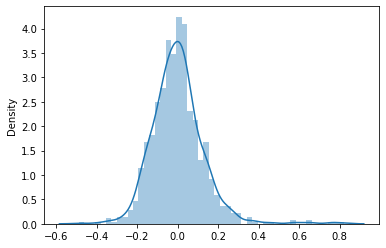

In [78]:
y_trainpred=lrmodel.predict(sm.add_constant(Xtrain[selected_features]))
yres=y_trainpred-Ytrain #getting residuals
sns.distplot(yres)

<B>Observation-:</B> Above distribution plot is validating the assumption of normality of residuals.

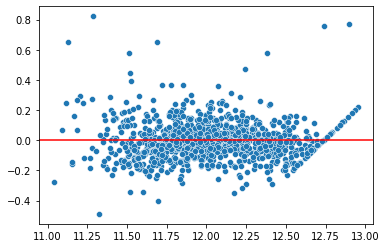

In [79]:
sns.scatterplot(y_trainpred,yres)
plt.axhline(0,color='red')

<B>Observation-:</B>Above scatter plot is proving that <B>the residuals are distributed randomly</B> , around <B>mean being 0</B> , and <B>having equal variance.</B>

<center><h3>Evaluating linear regression model</h3></center>

In [80]:
ypreddict={'Linearpred':[],'Ridgepred':[],'Lassopred':[]}
y_testpred=lrmodel.predict(sm.add_constant(Xtest[selected_features]))
ypreddict['Linearpred']=y_testpred

In [81]:
lrmetrics={'LinearRegression':[],'Ridge':[],'Lasso':[]}

r2score=r2_score(Ytrain,y_trainpred)
print("R2 Score linear reg train",r2score)
lrmetrics["LinearRegression"].append(r2score)

r2score=r2_score(Ytest,y_testpred)
print("R2 Score linear reg test",r2score)
lrmetrics["LinearRegression"].append(r2score)

rsstrain=np.sum(np.square(Ytrain-y_trainpred))
print("RSS  linear reg train",rsstrain)
lrmetrics["LinearRegression"].append(rsstrain)

rsstest=np.sum(np.square(Ytest-y_testpred))
print("RSS  linear reg test",rsstest)
lrmetrics["LinearRegression"].append(rsstest)

mse=mean_squared_error(Ytrain,y_trainpred)
print("MSE  linear reg train",mse)
lrmetrics["LinearRegression"].append(mse)

mse_test=mean_squared_error(Ytest,y_testpred)
print("MSE  linear reg test",mse_test)
lrmetrics["LinearRegression"].append(mse)

rmse=mse**0.5
print("RMSE  linear reg train",rmse)
lrmetrics["LinearRegression"].append(rmse)

rmse=mse_test**0.5
print("RMSE  linear reg test",rmse)
lrmetrics["LinearRegression"].append(rmse)

R2 Score linear reg train 0.8858014374853576
R2 Score linear reg test 0.8430578713491521
RSS  linear reg train 16.677648583029967
RSS  linear reg test 10.044614623856901
MSE  linear reg train 0.016318638535254372
MSE  linear reg test 0.022932910100129912
RMSE  linear reg train 0.12774442663088817
RMSE  linear reg test 0.15143615849634431


<center><h2>Regularizing linear regression model using Ridge(L1) and Lasso(L2)</h2></center>

In [82]:
#defining different alphas for regularization 
lambdas={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100\
                ,200,300,400,500,600,700,800,900,1000]}

<center><h3>Building a Ridge regression model</h3></center>

In [83]:
rm=Ridge()
folds=5
model_cv=GridSearchCV(estimator=rm,param_grid=lambdas,scoring='neg_mean_absolute_error'\
                      ,cv=folds,\
                      return_train_score=True\
                     ,verbose=1)
model_cv.fit(Xtrain[selected_features],Ytrain)
print(model_cv.best_params_)

Fitting 5 folds for each of 41 candidates, totalling 205 fits
{'alpha': 10}


<B>Observation -:</B> The optimal value of alpha for ridge regression model is given as 10 by Grid serach Cross validation method

In [84]:
rmodel=Ridge(alpha=10)
rmodel.fit(Xtrain[selected_features],Ytrain)

y_trainpred=rmodel.predict(Xtrain[selected_features])
y_testpred=rmodel.predict(Xtest[selected_features])
ypreddict['Ridgepred']=y_testpred

<center><h3>Evaluating Ridge regression model</h3></center>

In [85]:
r2score=r2_score(Ytrain,y_trainpred)
print("R2 Score Ridge reg train",r2score)
lrmetrics["Ridge"].append(r2score)

r2score=r2_score(Ytest,y_testpred)
print("R2 Score Ridge reg test",r2score)
lrmetrics["Ridge"].append(r2score)

rsstrain=np.sum(np.square(Ytrain-y_trainpred))
print("RSS  Ridge reg train",rsstrain)
lrmetrics["Ridge"].append(rsstrain)

rsstest=np.sum(np.square(Ytest-y_testpred))
print("RSS  Ridge reg test",rsstest)
lrmetrics["Ridge"].append(rsstest)

mse=mean_squared_error(Ytrain,y_trainpred)
print("MSE  linear reg train",mse)
lrmetrics["Ridge"].append(mse)

msetest=mean_squared_error(Ytest,y_testpred)
print("MSE  Ridge reg test",msetest)
lrmetrics["Ridge"].append(msetest)

rmse=mse**0.5
print("RMSE  Ridge reg train",rmse)
lrmetrics["Ridge"].append(rmse)

rmse=msetest**0.5
print("RMSE  Ridge reg test",rmse)
lrmetrics["Ridge"].append(rmse)

R2 Score Ridge reg train 0.8834434525833952
R2 Score Ridge reg test 0.8469192919953583
RSS  Ridge reg train 17.022010567043345
RSS  Ridge reg test 9.797475868793658
MSE  linear reg train 0.016655587638985662
MSE  Ridge reg test 0.022368666367108807
RMSE  Ridge reg train 0.12905652885067714
RMSE  Ridge reg test 0.1495615805182227


<center><h3>Building a Lasso regression model</h3></center>

In [86]:
lasm=Lasso()
folds=5
model_cv=GridSearchCV(estimator=lasm,param_grid=lambdas,scoring='neg_mean_absolute_error'\
                      ,cv=folds,\
                      return_train_score=True\
                     ,verbose=1)
model_cv.fit(Xtrain[selected_features],Ytrain)
print(model_cv.best_params_)

Fitting 5 folds for each of 41 candidates, totalling 205 fits
{'alpha': 0.0001}


<B>Observation -:</B> The optimal value of alpha for Lasso regression model is given as 0.0001 by Grid serach Cross validation method

In [87]:
lm=Lasso(alpha=0.0001)

lm.fit(Xtrain[selected_features],Ytrain)

Lasso(alpha=0.0001)

In [88]:
y_trainpred=lm.predict(Xtrain[selected_features])
y_testpred=lm.predict(Xtest[selected_features])
ypreddict['Lassopred']=y_testpred

<center><h3>Evaluating Lasso regression model</h3></center>

In [89]:
r2score=r2_score(Ytrain,y_trainpred)
print("R2 Score Lasso reg train",r2score)
lrmetrics["Lasso"].append(r2score)

r2score=r2_score(Ytest,y_testpred)
print("R2 Score Lasso reg test",r2score)
lrmetrics["Lasso"].append(r2score)

rsstrain=np.sum(np.square(Ytrain-y_trainpred))
print("RSS  Lasso reg train",rsstrain)
lrmetrics["Lasso"].append(rsstrain)

rsstest=np.sum(np.square(Ytest-y_testpred))
print("RSS  Lasso reg test",rsstest)
lrmetrics["Lasso"].append(rsstest)

mse=mean_squared_error(Ytrain,y_trainpred)
print("MSE  Lasso reg train",mse)
lrmetrics["Lasso"].append(mse)

msetest=mean_squared_error(Ytest,y_testpred)
print("MSE  Lasso reg test",msetest)
lrmetrics["Lasso"].append(msetest)

rmse=mse**0.5
print("RMSE  Lasso reg train",rmse)
lrmetrics["Lasso"].append(rmse)

rmse=msetest**0.5
print("RMSE  Lasso reg test",rmse)
lrmetrics["Lasso"].append(rmse)

R2 Score Lasso reg train 0.8857102239564844
R2 Score Lasso reg test 0.8442176521997251
RSS  Lasso reg train 16.690969479082145
RSS  Lasso reg test 9.970386296560207
MSE  Lasso reg train 0.016331672680119515
MSE  Lasso reg test 0.02276343903324248
RMSE  Lasso reg train 0.12779543293920764
RMSE  Lasso reg test 0.15087557467410848


<center><h2>Comparing Evaluation metrics for linear , Ridge and Lasso regression</h2></center>

In [90]:
#model Evaluation dataframe
df=pd.DataFrame(index=['R2Score(train)','R2Score(test)','RSS(train)','RSS(test)','MSE(train)','MSE(test)','RMSE(train)'\
                       ,'RMSE(test)'],
                        columns=lrmetrics)
df['LinearRegression']=lrmetrics['LinearRegression']
df['Ridge']=lrmetrics['Ridge']
df['Lasso']=lrmetrics['Lasso']

In [91]:
df

,LinearRegression,Ridge,Lasso
R2Score(train),0.885801,0.883443,0.885710
R2Score(test),0.843058,0.846919,0.844218
RSS(train),16.677649,17.022011,16.690969
RSS(test),10.044615,9.797476,9.970386
MSE(train),0.016319,0.016656,0.016332
MSE(test),0.016319,0.022369,0.022763
RMSE(train),0.127744,0.129057,0.127795
RMSE(test),0.151436,0.149562,0.150876


<B>Observation -:</B> The Ridge regression seems to be better as it is performing better in test data set . Thus we will use Ridge regression for finding best featurtes.

In [92]:
lrmetrics

{'LinearRegression': [0.8858014374853576,
  0.8430578713491521,
  16.677648583029967,
  10.044614623856901,
  0.016318638535254372,
  0.016318638535254372,
  0.12774442663088817,
  0.15143615849634431],
 'Ridge': [0.8834434525833952,
  0.8469192919953583,
  17.022010567043345,
  9.797475868793658,
  0.016655587638985662,
  0.022368666367108807,
  0.12905652885067714,
  0.1495615805182227],
 'Lasso': [0.8857102239564844,
  0.8442176521997251,
  16.690969479082145,
  9.970386296560207,
  0.016331672680119515,
  0.02276343903324248,
  0.12779543293920764,
  0.15087557467410848]}

<center><h2>Checking the model coefficients for linear , ridge and lasso regression</h2></center>

In [93]:
coefficientsdf=pd.DataFrame(index=selected_features,columns=['LinearRegression','Ridge(alpha=10)','Lasso(alpha=0.0001)'])
coefficientsdf['LinearRegression']=lrmodel.params
coefficientsdf['Ridge(alpha=10)']=rmodel.coef_
coefficientsdf['Lasso(alpha=0.0001)']=lm.coef_

In [94]:
coefficientsdf

,LinearRegression,Ridge(alpha=10),Lasso(alpha=0.0001)
OverallQual,0.102303,0.107097,0.103253
YearRemodAdd,0.067097,0.068779,0.067409
BsmtUnfSF,-0.048872,-0.049006,-0.048912
TotalBsmtSF,0.094630,0.096359,0.094850
GrLivArea,0.131478,0.129924,0.131196
MSZoning_RM,-0.100242,-0.100547,-0.100838
LotShape_IR3,-0.117981,-0.053213,-0.105812
LandContour_Low,0.069544,0.050898,0.065994
Neighborhood_Crawfor,0.096991,0.072099,0.093260
Neighborhood_Edwards,-0.080228,-0.079522,-0.080689


<Center><h3>Extracting important features from the best model</h3></Center>

We are choosing the features which have a positive coefficient as the aim of our model was to find out the fetures which positively contributes to the sale price variable.

In [95]:
c=coefficientsdf['Ridge(alpha=10)'].sort_values(ascending=False)

In [96]:
c[:16]

GrLivArea               0.129924
OverallQual             0.107097
TotalBsmtSF             0.096359
Exterior1st_BrkFace     0.080856
Exterior1st_VinylSd     0.074669
Neighborhood_Crawfor    0.072099
YearRemodAdd            0.068779
Neighborhood_Somerst    0.062489
FireplaceQu_Gd          0.052541
LandContour_Low         0.050898
Exterior1st_Plywood     0.049962
Exterior2nd_CmentBd     0.046512
SaleCondition_Normal    0.046389
Exterior2nd_MetalSd     0.035928
Exterior1st_HdBoard     0.034882
Exterior1st_WdShing     0.032181
Name: Ridge(alpha=10), dtype: float64

<B>Obesrvation:-</B> We got our top 16 variables which contributes to the saleprice positively .

<center><h1>Subjective questions answer</h1></center>

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso ?

In [100]:
lm=Lasso(alpha=0.0002)

lm.fit(Xtrain[selected_features],Ytrain)

Lasso(alpha=0.0002)

In [101]:
y_trainpred=lm.predict(Xtrain[selected_features])
y_testpred=lm.predict(Xtest[selected_features])

In [102]:
r2score=r2_score(Ytrain,y_trainpred)
print("R2 Score Lasso reg train",r2score)


r2score=r2_score(Ytest,y_testpred)
print("R2 Score Lasso reg test",r2score)


rsstrain=np.sum(np.square(Ytrain-y_trainpred))
print("RSS  Lasso reg train",rsstrain)


rsstest=np.sum(np.square(Ytest-y_testpred))
print("RSS  Lasso reg test",rsstest)


mse=mean_squared_error(Ytrain,y_trainpred)
print("MSE  Lasso reg train",mse)


msetest=mean_squared_error(Ytest,y_testpred)
print("MSE  Lasso reg test",msetest)


rmse=mse**0.5
print("RMSE  Lasso reg train",rmse)


rmse=msetest**0.5
print("RMSE  Lasso reg test",rmse)


R2 Score Lasso reg train 0.8854369425030413
R2 Score Lasso reg test 0.8452761025332203
RSS  Lasso reg train 16.730879719144916
RSS  Lasso reg test 9.902643327926816
MSE  Lasso reg train 0.016370723795640817
MSE  Lasso reg test 0.0226087747212941
RMSE  Lasso reg train 0.12794812931669153
RMSE  Lasso reg test 0.1503621452403965


In [103]:
rmodel=Ridge(alpha=20)
rmodel.fit(Xtrain[selected_features],Ytrain)

Ridge(alpha=20)

In [104]:
y_trainpred=rmodel.predict(Xtrain[selected_features])
y_testpred=rmodel.predict(Xtest[selected_features])

In [105]:
r2score=r2_score(Ytrain,y_trainpred)
print("R2 Score Ridge reg train",r2score)


r2score=r2_score(Ytest,y_testpred)
print("R2 Score Ridge reg test",r2score)


rsstrain=np.sum(np.square(Ytrain-y_trainpred))
print("RSS  Ridge reg train",rsstrain)


rsstest=np.sum(np.square(Ytest-y_testpred))
print("RSS  Ridge reg test",rsstest)


mse=mean_squared_error(Ytrain,y_trainpred)
print("MSE  linear reg train",mse)


msetest=mean_squared_error(Ytest,y_testpred)
print("MSE  Ridge reg test",msetest)


rmse=mse**0.5
print("RMSE  Ridge reg train",rmse)


rmse=msetest**0.5
print("RMSE  Ridge reg test",rmse)


R2 Score Ridge reg train 0.8807056283605605
R2 Score Ridge reg test 0.8473828285949884
RSS  Ridge reg train 17.421844586536267
RSS  Ridge reg test 9.7678085860356
MSE  linear reg train 0.01704681466392981
MSE  Ridge reg test 0.022300932844830135
RMSE  Ridge reg train 0.13056345072006106
RMSE  Ridge reg test 0.14933496859352846


What will be the most important predictor variables after the change is implemented?


In [127]:
z= zip(selected_features,rmodel.coef_)

sorted(z,key=lambda i:i[1],reverse=True)[:16]


[('GrLivArea', 0.12880220040969229),
 ('OverallQual', 0.11009585379052444),
 ('TotalBsmtSF', 0.09700642312770479),
 ('YearRemodAdd', 0.06973029289282447),
 ('Exterior1st_VinylSd', 0.06367918745275183),
 ('Exterior1st_BrkFace', 0.060525936386211024),
 ('Neighborhood_Crawfor', 0.0585156984156856),
 ('Neighborhood_Somerst', 0.05357601485345618),
 ('FireplaceQu_Gd', 0.0514850458619061),
 ('SaleCondition_Normal', 0.04337973755598019),
 ('LandContour_Low', 0.041336136411322),
 ('Exterior1st_Plywood', 0.03906779439614654),
 ('Exterior2nd_CmentBd', 0.030826176016407806),
 ('Exterior2nd_MetalSd', 0.02675447800732282),
 ('Exterior1st_HdBoard', 0.025100887342272987),
 ('Exterior1st_WdShing', 0.020326448631372302)]

In [130]:
z= zip(selected_features,lm.coef_)

sorted(z,key=lambda i:i[1],reverse=True)[:16]

[('GrLivArea', 0.1309157041597706),
 ('Exterior1st_BrkFace', 0.11112180018328224),
 ('OverallQual', 0.10420211270230903),
 ('TotalBsmtSF', 0.09506941970498337),
 ('Neighborhood_Crawfor', 0.08954209763389011),
 ('Exterior1st_VinylSd', 0.08856667878973365),
 ('Neighborhood_Somerst', 0.07158678409652011),
 ('Exterior2nd_CmentBd', 0.06845979624557258),
 ('YearRemodAdd', 0.06771950834988588),
 ('Exterior1st_Plywood', 0.06362403481262328),
 ('LandContour_Low', 0.062446772077881),
 ('FireplaceQu_Gd', 0.05184798669241658),
 ('SaleCondition_Normal', 0.047609422074981034),
 ('Exterior1st_WdShing', 0.04726388583574496),
 ('Exterior1st_HdBoard', 0.04703112036491797),
 ('Exterior2nd_MetalSd', 0.04622301994988033)]

After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [134]:
top5features=['GrLivArea','Exterior1st_BrkFace','OverallQual','TotalBsmtSF','Neighborhood_Crawfor']
selected_features=[i  for i in selected_features if i not in top5features]

In [135]:
lm=Lasso(alpha=0.0001)

lm.fit(Xtrain[selected_features],Ytrain)

Lasso(alpha=0.0001)

In [137]:
z= zip(selected_features,lm.coef_)

sorted(z,key=lambda i:i[1],reverse=True)[:5]

[('FireplaceQu_Gd', 0.19560839177476877),
 ('Exterior2nd_CmentBd', 0.16498346791472507),
 ('YearRemodAdd', 0.14089928439853977),
 ('LandContour_Low', 0.09651241526842361),
 ('Exterior1st_Plywood', 0.0927283017847213)]